## Anas Majeed
## 21011519-019
## Assignment #1

### Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Step Function

In [ ]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

### Class Initialization

In [ ]:
class Perceptron:
    def __init__(self, layer_sizes, weights, biases):
        self.layer_sizes = layer_sizes
        self.weights = weights
        self.biases = biases

    def forward(self, X):

        X = np.array(X)
        print("Initial input:", X)


        activations = [X]


        for i in range(len(self.weights)):
            print(f"\nWeights for layer {i + 1}:")
            print(self.weights[i])
            print(f"\nBias for layer {i + 1}:")
            print(self.biases[i])


            layer_output = np.dot(self.weights[i], X) + self.biases[i]
            print(f"\nDot product of layer {i + 1} (plus bias):")
            print(layer_output)

            X = unit_step_func(layer_output)
            if i == len(self.weights) - 1:
                print("\nOutputs of Output Layer after activation:")
            else:
                print(f"\nOutputs of layer {i + 1} after activation:")
            print(X)

            activations.append(X)

        return activations

    # TO DRAW NEURAL NETWORK
    def draw_graph(self, activations):

        G = nx.DiGraph()


        positions = {}
        layer_idx = 0
        node_idx = 0


        vertical_spacing = 2.0
        horizontal_spacing = 3.0


        for layer_size, activation in zip(self.layer_sizes, activations):
            for i in range(layer_size):
                node_id = node_idx
                positions[node_id] = (layer_idx * horizontal_spacing, -i * vertical_spacing)
                G.add_node(node_id, label=f'{activation[i]:.2f}')
                node_idx += 1
            layer_idx += 1


        output_layer_size = self.layer_sizes[-1]
        hidden_layer_size = self.layer_sizes[1]


        output_vertical_position = -(hidden_layer_size - 1) * vertical_spacing / 2


        output_node_idx = node_idx - output_layer_size
        positions[output_node_idx] = (layer_idx * horizontal_spacing, output_vertical_position)


        node_idx = 0
        for i in range(len(self.weights)):
            next_node_idx = node_idx + self.layer_sizes[i]
            for j in range(self.layer_sizes[i]):
                for k in range(self.layer_sizes[i + 1]):
                    G.add_edge(node_idx + j, next_node_idx + k, weight=f'{self.weights[i][k, j]:.2f}')
            node_idx += self.layer_sizes[i]


        labels = nx.get_node_attributes(G, 'label')
        edge_labels = nx.get_edge_attributes(G, 'weight')


        node_color = 'orange'


        nx.draw(G, pos=positions, with_labels=True, labels=labels, node_size=2000, node_color=node_color, font_size=8, font_weight='bold')


        edge_label_pos = {k: (v[0] + 0.1, v[1] + 0.1) for k, v in positions.items()}  # Offset edge labels to prevent overlap
        nx.draw_networkx_edge_labels(G, pos=edge_label_pos, edge_labels=edge_labels, font_color='brown', label_pos=0.3)

        plt.title("Perceptron Network")
        plt.show()

## FORWARD PROPOGATION - Classification Examples

### 1. Spam Email Detection

Inputs: Email length (X₁), Number of links (X₂)

Initial input: [500  10]

Weights for layer 1:
[[ 0.3  0.2]
 [ 0.4 -0.5]
 [-0.3  0.6]]

Bias for layer 1:
[ 0.1 -0.1  0.3]

Dot product of layer 1 (plus bias):
[ 152.1  194.9 -143.7]

Outputs of layer 1 after activation:
[1 1 0]

Weights for layer 2:
[[ 0.5  0.2 -0.4]]

Bias for layer 2:
[0.2]

Dot product of layer 2 (plus bias):
[0.9]

Outputs of Output Layer after activation:
[1]


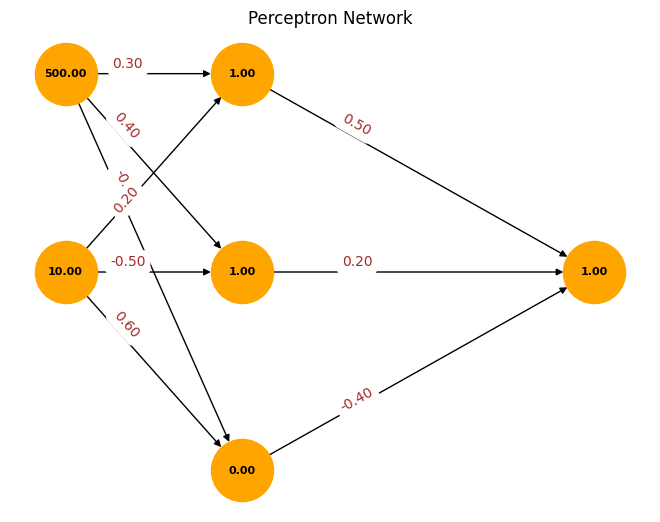

In [ ]:
layer_sizes = [2, 3, 1]
weights = [
    np.array([[0.3, 0.2],
              [0.4, -0.5],
              [-0.3, 0.6]]),
    np.array([[0.5, 0.2, -0.4]])
]

biases = [
    np.array([0.1, -0.1, 0.3]),
    np.array([0.2])
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [500, 10]  # Email length and number of links

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)

### 2. Credit Card Fraud Detection

Inputs: Transaction Amount (X₁), Transaction Time (X₂)

Initial input: [500   3]

Weights for layer 1:
[[ 0.4 -0.6]
 [ 0.3  0.2]]

Bias for layer 1:
[0.1 0.3]

Dot product of layer 1 (plus bias):
[198.3 150.9]

Outputs of layer 1 after activation:
[1 1]

Weights for layer 2:
[[0.7 0.5]]

Bias for layer 2:
[0.2]

Dot product of layer 2 (plus bias):
[1.4]

Outputs of Output Layer after activation:
[1]


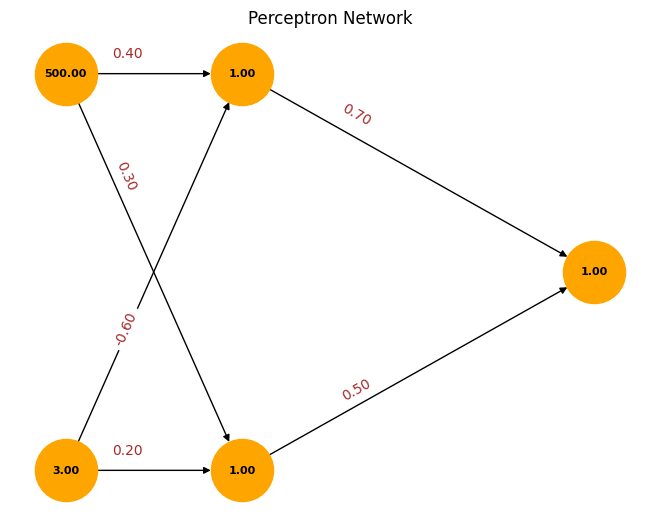

In [ ]:
layer_sizes = [2, 2, 1]
weights = [
    np.array([[0.4, -0.6],
              [0.3, 0.2]]),
    np.array([[0.7, 0.5]])
]

biases = [
    np.array([0.1, 0.3]),
    np.array([0.2])
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [500, 3]  # Transaction Amount and Transaction Time (in hours)

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)

### 3. Diabetes Prediction

Inputs (Age, Glucose Level, BMI)

Initial input: [150  35  50]

Weights for layer 1:
[[ 0.3  0.1  0.2]
 [-0.2  0.4  0.1]
 [ 0.5 -0.6  0.3]]

Bias for layer 1:
[ 0.2 -0.1  0.1]

Dot product of layer 1 (plus bias):
[ 58.7 -11.1  69.1]

Outputs of layer 1 after activation:
[1 0 1]

Weights for layer 2:
[[ 0.6 -0.3  0.2]]

Bias for layer 2:
[0.5]

Dot product of layer 2 (plus bias):
[1.3]

Outputs of Output Layer after activation:
[1]


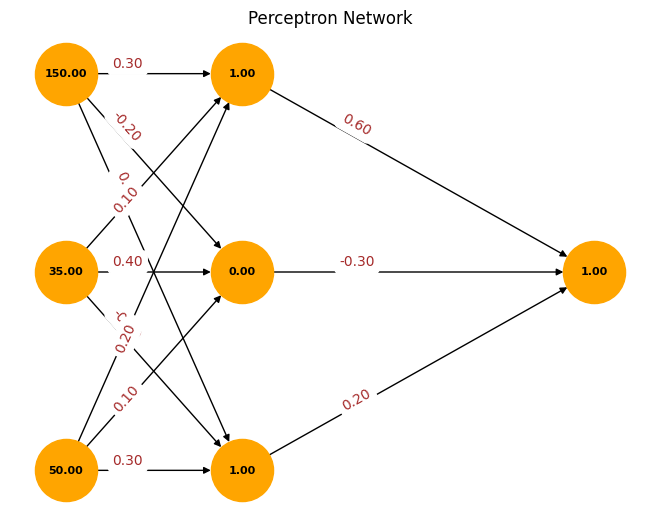

In [ ]:
layer_sizes = [3, 3, 1]  # Increased input size from 2 to 3
weights = [
    np.array([[0.3, 0.1, 0.2],  # Added a new input weight
              [-0.2, 0.4, 0.1],
              [0.5, -0.6, 0.3]]),
    np.array([[0.6, -0.3, 0.2]])
]

biases = [
    np.array([0.2, -0.1, 0.1]),
    np.array([0.5])
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [150, 35, 50]

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)


### 4. Heart Disease Prediction

Inputs (Blood Pressure, Cholesterol Level, Weight)

Initial input: [120 200  75]

Weights for layer 1:
[[ 0.2  0.5  0.3]
 [ 0.1 -0.4  0.2]
 [-0.2  0.3 -0.1]]

Bias for layer 1:
[ 0.2  0.1 -0.1]

Dot product of layer 1 (plus bias):
[146.7 -52.9  28.4]

Outputs of layer 1 after activation:
[1 0 1]

Weights for layer 2:
[[ 0.5  0.6 -0.3]]

Bias for layer 2:
[0.3]

Dot product of layer 2 (plus bias):
[0.5]

Outputs of Output Layer after activation:
[1]


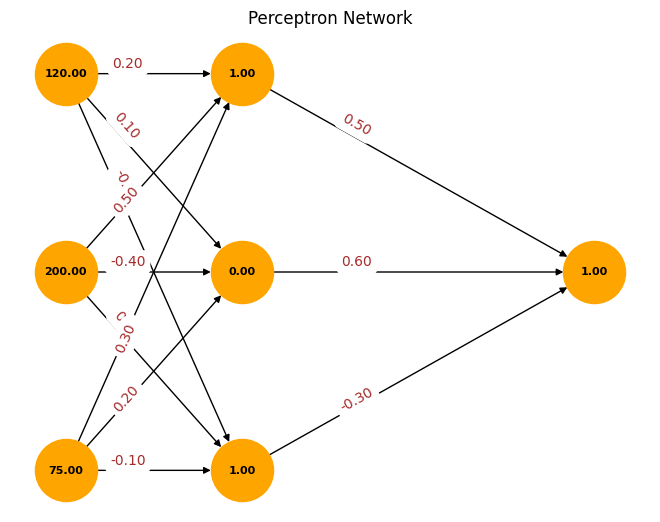

In [ ]:
layer_sizes = [3, 3, 1]  # Increased input size from 2 to 3
weights = [
    np.array([[0.2, 0.5, 0.3],  # Added a new input weight
              [0.1, -0.4, 0.2],
              [-0.2, 0.3, -0.1]]),
    np.array([[0.5, 0.6, -0.3]])
]

biases = [
    np.array([0.2, 0.1, -0.1]),
    np.array([0.3])
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [120, 200, 75]

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)


### 5. Loan Approval Prediction

Inputs (Age, Credit Score, Number of Dependents, Employment Years)

Initial input: [ 30 700   3  50]

Weights for layer 1:
[[ 0.1 -0.3  0.2  0.4]
 [ 0.4  0.2 -0.1  0.5]]

Bias for layer 1:
[0.1 0.2]

Dot product of layer 1 (plus bias):
[-186.3  176.9]

Outputs of layer 1 after activation:
[0 1]

Weights for layer 2:
[[0.6 0.3]]

Bias for layer 2:
[0.4]

Dot product of layer 2 (plus bias):
[0.7]

Outputs of Output Layer after activation:
[1]


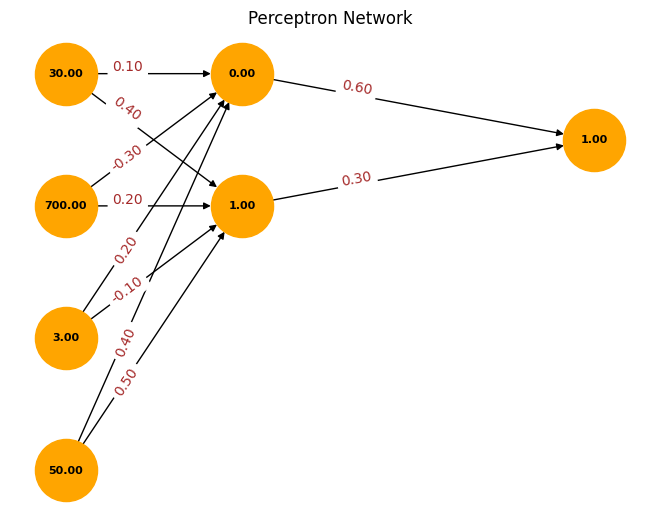

In [ ]:
layer_sizes = [4, 2, 1]  # Increased input size from 2 to 4
weights = [
    np.array([[0.1, -0.3, 0.2, 0.4],  # Added two new input weights
              [0.4, 0.2, -0.1, 0.5]]),
    np.array([[0.6, 0.3]])
]

biases = [
    np.array([0.1, 0.2]),
    np.array([0.4])
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [30, 700, 3, 50]

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)

## FORWARD PROPOGATION - Regression Examples

### Sigmoid Activation Function

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
class Perceptron:
    def __init__(self, layer_sizes, weights, biases):
        self.layer_sizes = layer_sizes
        self.weights = weights
        self.biases = biases

    def forward(self, X):

        X = np.array(X)
        print("Initial input:", X)


        activations = [X]


        for i in range(len(self.weights)):
            print(f"\nWeights for layer {i + 1}:")
            print(self.weights[i])
            print(f"\nBias for layer {i + 1}:")
            print(self.biases[i])


            layer_output = np.dot(self.weights[i], X) + self.biases[i]
            print(f"\nDot product of layer {i + 1} (plus bias):")
            print(layer_output)

            X = sigmoid(layer_output)
            if i == len(self.weights) - 1:
                print("\nOutputs of Output Layer after activation:")
            else:
                print(f"\nOutputs of layer {i + 1} after activation:")
            print(X)

            activations.append(X)

        return activations

    def draw_graph(self, activations):

        G = nx.DiGraph()


        positions = {}
        layer_idx = 0
        node_idx = 0


        vertical_spacing = 2.0
        horizontal_spacing = 3.0


        for layer_size, activation in zip(self.layer_sizes, activations):
            for i in range(layer_size):
                node_id = node_idx
                positions[node_id] = (layer_idx * horizontal_spacing, -i * vertical_spacing)
                G.add_node(node_id, label=f'{activation[i]:.2f}')
                node_idx += 1
            layer_idx += 1


        output_layer_size = self.layer_sizes[-1]
        hidden_layer_size = self.layer_sizes[1]  # Assume the hidden layer is the second layer (index 1)


        output_vertical_position = -(hidden_layer_size - 1) * vertical_spacing / 2


        output_node_idx = node_idx - output_layer_size
        positions[output_node_idx] = (layer_idx * horizontal_spacing, output_vertical_position)


        node_idx = 0
        for i in range(len(self.weights)):
            next_node_idx = node_idx + self.layer_sizes[i]
            for j in range(self.layer_sizes[i]):
                for k in range(self.layer_sizes[i + 1]):
                    G.add_edge(node_idx + j, next_node_idx + k, weight=f'{self.weights[i][k, j]:.2f}')
            node_idx += self.layer_sizes[i]


        labels = nx.get_node_attributes(G, 'label')
        edge_labels = nx.get_edge_attributes(G, 'weight')


        node_color = 'lightpink'


        nx.draw(G, pos=positions, with_labels=True, labels=labels, node_size=2000, node_color=node_color, font_size=8, font_weight='bold')


        edge_label_pos = {k: (v[0] + 0.1, v[1] + 0.1) for k, v in positions.items()}
        nx.draw_networkx_edge_labels(G, pos=edge_label_pos, edge_labels=edge_labels, font_color='blue', label_pos=0.3)

        plt.title("Perceptron Network")
        plt.show()

### 6. Car Price Prediction

Inputs: Age of Car (X₁), Mileage (X₂), Engine Size (X₃)

Initial input: [5.e+00 6.e+04 2.e+00]

Weights for layer 1:
[[-0.06580868  0.01122632  0.09493116]
 [-0.00695965  0.06897988 -0.02473426]
 [ 0.09682834 -0.0277384  -0.009566  ]]

Bias for layer 1:
[-0.06830459 -0.07484744  0.07034397]

Dot product of layer 1 (plus bias):
[  673.3716438   4138.63388016 -1663.76888295]

Outputs of layer 1 after activation:
[1. 1. 0.]

Weights for layer 2:
[[ 0.08406665  0.04274295 -0.0937847 ]]

Bias for layer 2:
[-0.01974895]

Dot product of layer 2 (plus bias):
[0.10706064]

Outputs of Output Layer after activation:
[0.52673963]


<ipython-input-9-b683d5dd8fa4>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


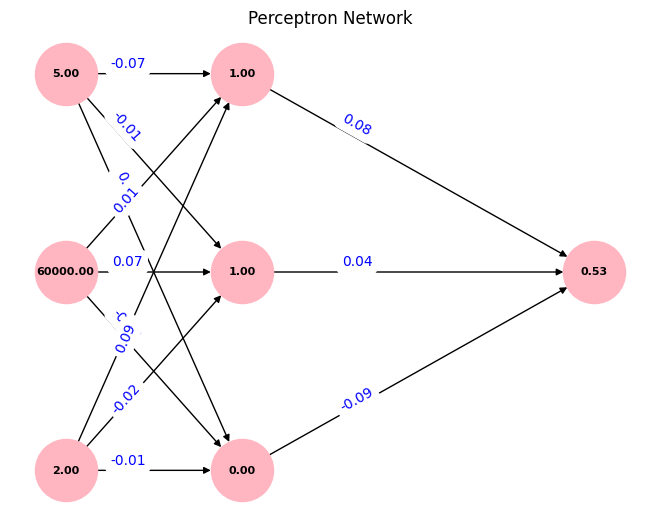

In [ ]:
layer_sizes = [3, 3, 1]
weights = [
    np.random.rand(3, 3) * 0.2 - 0.1,  # Random initialization for weights
    np.random.rand(1, 3) * 0.2 - 0.1
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Random initialization for biases
    np.random.rand(1) * 0.2 - 0.1
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [5, 60000, 2.0]  # Age of Car (years), Mileage (km), Engine Size (liters)

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)


### 7. House Price Prediction

Inputs: House Size (X₁), Number of Bedrooms (X₂), Distance to City (X₃), Age of House (X₄)

Initial input: [2500    4   10   15]

Weights for layer 1:
[[ 0.08017905  0.02395063 -0.0698555  -0.02011902]
 [-0.01842988  0.0609381  -0.00157195  0.08001105]
 [-0.09956525 -0.08928917  0.0423604  -0.04652782]]

Bias for layer 1:
[-0.05129344  0.07624648 -0.03906992]

Dot product of layer 1 (plus bias):
[ 199.4917836   -44.57024686 -249.58365509]

Outputs of layer 1 after activation:
[1.00000000e+000 4.39934206e-020 4.04758356e-109]

Weights for layer 2:
[[ 0.06511891 -0.00018463  0.01162646]]

Bias for layer 2:
[0.03602161]

Dot product of layer 2 (plus bias):
[0.10114052]

Outputs of Output Layer after activation:
[0.5252636]


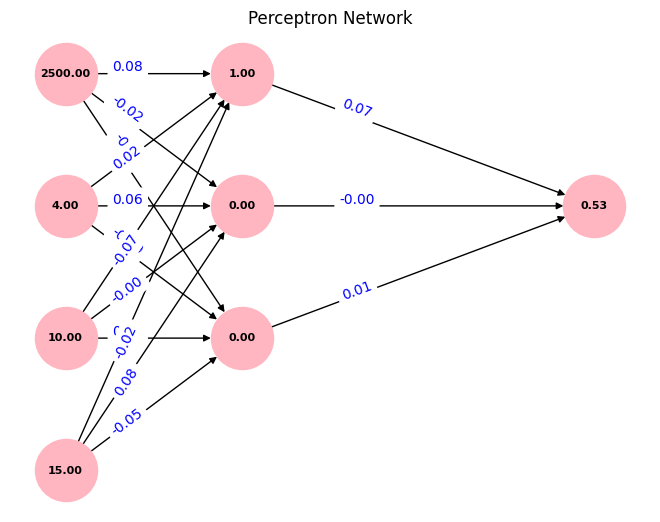

In [ ]:
layer_sizes = [4, 3, 1]
weights = [
    np.random.rand(3, 4) * 0.2 - 0.1,  # Random initialization for weights
    np.random.rand(1, 3) * 0.2 - 0.1
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Random initialization for biases
    np.random.rand(1) * 0.2 - 0.1
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [2500, 4, 10, 15]  # House Size (sqft), No. of Bedrooms, Distance to City (km), Age of House (years)

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)

### 8. Employee Salary Prediction

Inputs: Years of Experience (X₁), Education Level (X₂), Performance Rating (X₃), Number of Certifications (X₄), age

Initial input: [ 7  3 85  4 30]

Weights for layer 1:
[[-0.06856986  0.0318006   0.01105573 -0.06668542 -0.050832  ]
 [ 0.00336524 -0.00833763  0.04074348 -0.05774155 -0.06736476]
 [ 0.09491078  0.07277907  0.08841768  0.07242602 -0.00690643]
 [-0.03720375  0.05489074 -0.06361489  0.09857086  0.03883951]]

Bias for layer 1:
[ 0.01208174 -0.09809252  0.07782352  0.04256532]

Dot product of layer 1 (plus bias):
[-1.22446977  1.11173844  8.55855056 -3.90098574]

Outputs of layer 1 after activation:
[0.22715081 0.75245307 0.99980814 0.01982115]

Weights for layer 2:
[[-0.0388916  -0.09454608  0.01086824 -0.04562727]]

Bias for layer 2:
[0.051939]

Dot product of layer 2 (plus bias):
[-0.01807497]

Outputs of Output Layer after activation:
[0.49548138]


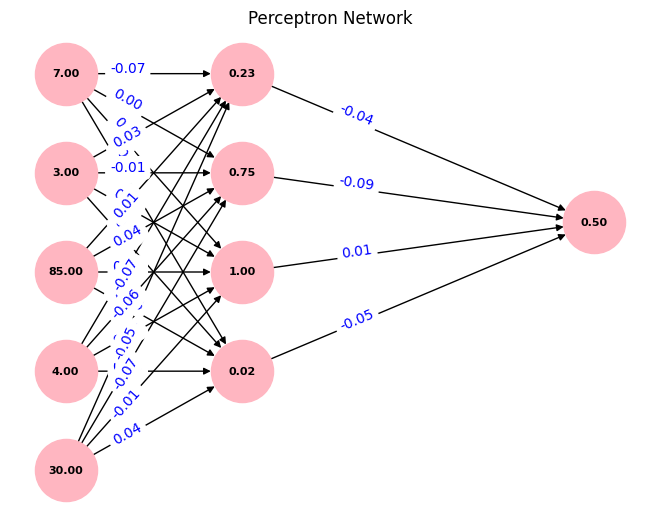

In [ ]:
layer_sizes = [5, 4, 1]
weights = [
    np.random.rand(4, 5) * 0.2 - 0.1,  # Random initialization for weights
    np.random.rand(1, 4) * 0.2 - 0.1
]
biases = [
    np.random.rand(4) * 0.2 - 0.1,  # Random initialization for biases
    np.random.rand(1) * 0.2 - 0.1
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [7, 3, 85, 4, 30]  # Years of Experience, Education Level, Performance Rating, Certifications, Age

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)

### 9. Household Energy Consumption Prediction

Inputs: Temperature (X₁), Humidity (X₂), Number of Occupants (X₃), Square Footage (X₄), Appliances in Use (X₅)

Initial input: [  22   60    4 1500    5]

Weights for layer 1:
[[-0.05662093 -0.08342025 -0.07748444 -0.08087243 -0.05601858]
 [ 0.02480257 -0.07222078  0.03823086 -0.02450685 -0.05472229]
 [ 0.01812346  0.00514393  0.01953223  0.08626383  0.05387003]]

Bias for layer 1:
[ 0.01918856 -0.06236604  0.04504082]

Dot product of layer 1 (plus bias):
[-128.13036997  -40.73091416  130.49561634]

Outputs of layer 1 after activation:
[2.25780983e-56 2.04544939e-18 1.00000000e+00]

Weights for layer 2:
[[0.00412385 0.08700808 0.00724642]]

Bias for layer 2:
[-0.08093316]

Dot product of layer 2 (plus bias):
[-0.07368673]

Outputs of Output Layer after activation:
[0.48158665]


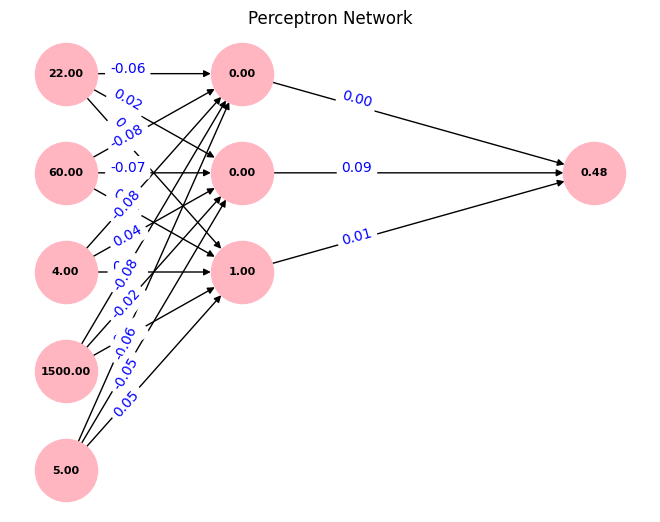

In [ ]:
layer_sizes = [5, 3, 1]
weights = [
    np.random.rand(3, 5) * 0.2 - 0.1,  # Random initialization for weights
    np.random.rand(1, 3) * 0.2 - 0.1
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Random initialization for biases
    np.random.rand(1) * 0.2 - 0.1
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [22, 60, 4, 1500, 5]  # Temperature (°C), Humidity (%), Occupants, Square Footage, Appliances in Use

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)

### 10. Sales Revenue Prediction

Inputs: Advertising Spend (X₁), Number of Sales Agents (X₂), Customer Satisfaction Score (X₃), Online Presence Score (X₄), Market Competitiveness Score (X₅)

Initial input: [50000    50    80    90    70]

Weights for layer 1:
[[ 0.07480066 -0.04351128  0.01826926  0.00434721 -0.04414425]
 [-0.03763216  0.03288587  0.08613052 -0.05748884 -0.05931592]
 [-0.08011874 -0.06579984  0.03826737  0.03320727 -0.06085625]]

Bias for layer 1:
[-0.04136244 -0.03164431 -0.05977664]

Dot product of layer 1 (plus bias):
[ 3736.57867693 -1882.43086733 -4007.49682049]

Outputs of layer 1 after activation:
[1. 0. 0.]

Weights for layer 2:
[[ 0.01496021 -0.06934357  0.01777297]]

Bias for layer 2:
[-0.04938074]

Dot product of layer 2 (plus bias):
[-0.03442053]

Outputs of Output Layer after activation:
[0.49139572]


<ipython-input-9-b683d5dd8fa4>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


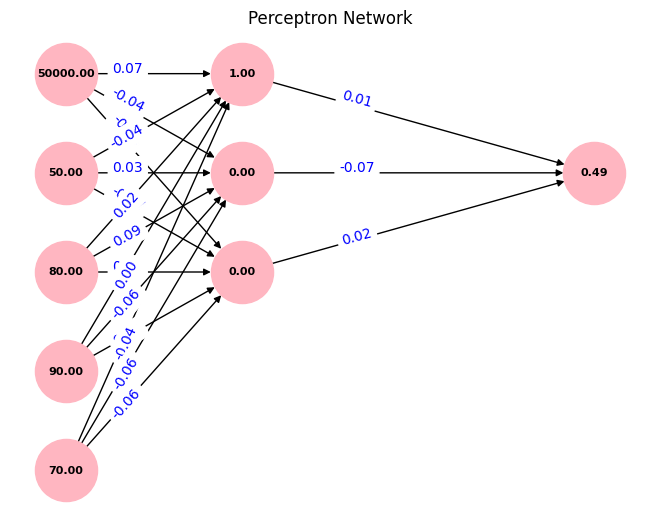

In [ ]:
layer_sizes = [5, 3, 1]
weights = [
    np.random.rand(3, 5) * 0.2 - 0.1,  # Random initialization for weights
    np.random.rand(1, 3) * 0.2 - 0.1
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Random initialization for biases
    np.random.rand(1) * 0.2 - 0.1
]

perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [50000, 50, 80, 90, 70]  # Advertising Spend, Sales Agents, Customer Satisfaction, Online Presence, Market Competitiveness

activations = perceptron.forward(input_data)
perceptron.draw_graph(activations)

## BACKWARD PROPOGATION - Regression Examples

In [ ]:
def sigmoid(x):
    # Clipping input to avoid overflow in exp
    x = np.clip(x, -500, 500)  # Clip the input to be in the range [-500, 500]
    return 1 / (1 + np.exp(-x))

### Sigmoid Derivative

In [ ]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Preceptron class including Back Propogation

In [ ]:
class Perceptron:
    def __init__(self, layer_sizes, weights, biases, learning_rate=0.25):
        self.layer_sizes = layer_sizes
        self.weights = weights
        self.biases = biases
        self.learning_rate = learning_rate  # learning rate for weight updates

    def forward(self, X):
        X = np.array(X)
        print("Initial input:", X)

        activations = [X]  # To store activations of all layers
        zs = []  # To store z (dot product plus bias) values of all layers

        for i in range(len(self.weights)):
            print(f"\nWeights for layer {i + 1}:")
            print(self.weights[i])
            print(f"\nBias for layer {i + 1}:")
            print(self.biases[i])

            z = np.dot(self.weights[i], X) + self.biases[i]
            print(f"\nDot product of layer {i + 1} (plus bias):")
            print(z)

            zs.append(z)  # Save the z-values for backpropagation

            X = sigmoid(z)
            activations.append(X)

            if i == len(self.weights) - 1:
                print("\nOutputs of Output Layer after activation:")
            else:
                print(f"\nOutputs of layer {i + 1} after activation:")
            print(X)

        return activations, zs  # Return activations and z-values for backpropagation

    def backprop(self, X, y):
        activations, zs = self.forward(X)  # Get forward pass results

        # Convert y to array if it's not already
        y = np.array(y)

        # Step 1: Calculate output layer error (delta)
        output_activation = activations[-1]
        delta = (output_activation - y) * sigmoid_derivative(zs[-1])

        # Store gradients of weights and biases for each layer
        weight_grads = []
        bias_grads = []

        # Step 2: Backpropagate through layers
        for i in reversed(range(len(self.weights))):
            # Get gradients for weights and biases
            weight_grad = np.outer(delta, activations[i])
            bias_grad = delta

            weight_grads.insert(0, weight_grad)  # Insert at the beginning for correct order
            bias_grads.insert(0, bias_grad)

            if i > 0:  # Calculate delta for the previous layer
                delta = np.dot(self.weights[i].T, delta) * sigmoid_derivative(zs[i - 1])

        return weight_grads, bias_grads

    def update_weights(self, weight_grads, bias_grads):
        # Display old weights and biases
        print("\nOld Weights and Biases:")
        for i in range(len(self.weights)):
            print(f"Layer {i + 1} weights:\n", self.weights[i])
            print(f"Layer {i + 1} biases:\n", self.biases[i])

        # Step 3: Update weights and biases using the gradients
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * weight_grads[i]
            self.biases[i] -= self.learning_rate * bias_grads[i]

        # Display updated weights and biases
        print("\nUpdated Weights and Biases:")
        for i in range(len(self.weights)):
            print(f"Layer {i + 1} weights:\n", self.weights[i])
            print(f"Layer {i + 1} biases:\n", self.biases[i])

    def train(self, X, y):
        # Step 4: Perform backpropagation and weight update
        weight_grads, bias_grads = self.backprop(X, y)
        self.update_weights(weight_grads, bias_grads)

        # Forward pass with updated weights
        print("\nForward Pass with Updated Weights:")
        activations, _ = self.forward(X)
        return activations

    # The draw_graph method remains the same as before
    def draw_graph(self, activations):
        G = nx.DiGraph()
        positions = {}
        layer_idx = 0
        node_idx = 0

        vertical_spacing = 2.0
        horizontal_spacing = 3.0

        for layer_size, activation in zip(self.layer_sizes, activations):
            for i in range(layer_size):
                node_id = node_idx
                positions[node_id] = (layer_idx * horizontal_spacing, -i * vertical_spacing)
                G.add_node(node_id, label=f'{activation[i]:.2f}')
                node_idx += 1
            layer_idx += 1

        output_layer_size = self.layer_sizes[-1]
        hidden_layer_size = self.layer_sizes[1]  # Assume the hidden layer is the second layer (index 1)

        output_vertical_position = -(hidden_layer_size - 1) * vertical_spacing / 2
        output_node_idx = node_idx - output_layer_size
        positions[output_node_idx] = (layer_idx * horizontal_spacing, output_vertical_position)

        node_idx = 0
        for i in range(len(self.weights)):
            next_node_idx = node_idx + self.layer_sizes[i]
            for j in range(self.layer_sizes[i]):
                for k in range(self.layer_sizes[i + 1]):
                    G.add_edge(node_idx + j, next_node_idx + k, weight=f'{self.weights[i][k, j]:.2f}')
            node_idx += self.layer_sizes[i]

        labels = nx.get_node_attributes(G, 'label')
        edge_labels = nx.get_edge_attributes(G, 'weight')

        node_color = 'skyblue'
        nx.draw(G, pos=positions, with_labels=True, labels=labels, node_size=2000, node_color=node_color, font_size=8, font_weight='bold')

        edge_label_pos = {k: (v[0] + 0.1, v[1] + 0.1) for k, v in positions.items()}
        nx.draw_networkx_edge_labels(G, pos=edge_label_pos, edge_labels=edge_labels, font_color='red', label_pos=0.3)

        plt.title("Perceptron Network")
        plt.show()

    def show_both_graphs(self, X, y):
        # Step 1: Forward pass without training (before backpropagation)
        print("\nInitial Forward Pass:")
        initial_activations, _ = self.forward(X)
        print("\nGraph before backpropagation:")
        self.draw_graph(initial_activations)

        # Step 2: Perform training (backpropagation and weight update)
        print("\nTraining (Backpropagation and Weight Update):")
        updated_activations = self.train(X, y)

        # Step 3: Forward pass with updated weights (after backpropagation)
        print("\nGraph after backpropagation:")
        self.draw_graph(updated_activations)

### Example 1: Predicting Crop Yield

Inputs: Rainfall (mm) (X₁), Average Temperature (°C) (X₂), Soil pH Level (X₃), Fertilizer Used (kg) (X₄)


Initial Forward Pass:
Initial input: [100.   25.    6.5  50. ]

Weights for layer 1:
[[ 0.09893503 -0.09673155 -0.09741318  0.01474089]
 [ 0.00382074 -0.00842736 -0.06684137 -0.04276077]
 [ 0.05952186 -0.02439136  0.09967718  0.03886518]]

Bias for layer 1:
[0.03159661 0.0509222  0.06823566]

Dot product of layer 1 (plus bias):
[ 7.61066986 -2.35019548  8.00179875]

Outputs of layer 1 after activation:
[0.9995051  0.08705024 0.99966525]

Weights for layer 2:
[[-0.02897465 -0.07955438 -0.03979922]]

Bias for layer 2:
[0.05320099]

Dot product of layer 2 (plus bias):
[-0.02247045]

Outputs of Output Layer after activation:
[0.49438262]

Graph before backpropagation:


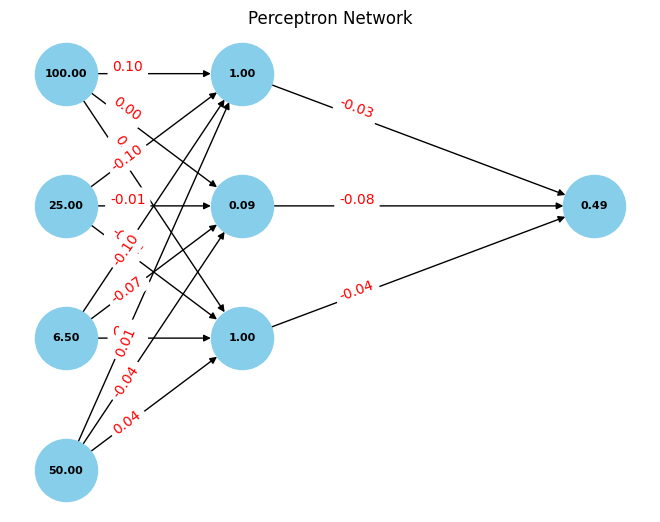


Training (Backpropagation and Weight Update):
Initial input: [100.   25.    6.5  50. ]

Weights for layer 1:
[[ 0.09893503 -0.09673155 -0.09741318  0.01474089]
 [ 0.00382074 -0.00842736 -0.06684137 -0.04276077]
 [ 0.05952186 -0.02439136  0.09967718  0.03886518]]

Bias for layer 1:
[0.03159661 0.0509222  0.06823566]

Dot product of layer 1 (plus bias):
[ 7.61066986 -2.35019548  8.00179875]

Outputs of layer 1 after activation:
[0.9995051  0.08705024 0.99966525]

Weights for layer 2:
[[-0.02897465 -0.07955438 -0.03979922]]

Bias for layer 2:
[0.05320099]

Dot product of layer 2 (plus bias):
[-0.02247045]

Outputs of Output Layer after activation:
[0.49438262]

Old Weights and Biases:
Layer 1 weights:
 [[ 0.09893503 -0.09673155 -0.09741318  0.01474089]
 [ 0.00382074 -0.00842736 -0.06684137 -0.04276077]
 [ 0.05952186 -0.02439136  0.09967718  0.03886518]]
Layer 1 biases:
 [0.03159661 0.0509222  0.06823566]
Layer 2 weights:
 [[-0.02897465 -0.07955438 -0.03979922]]
Layer 2 biases:
 [0.053200

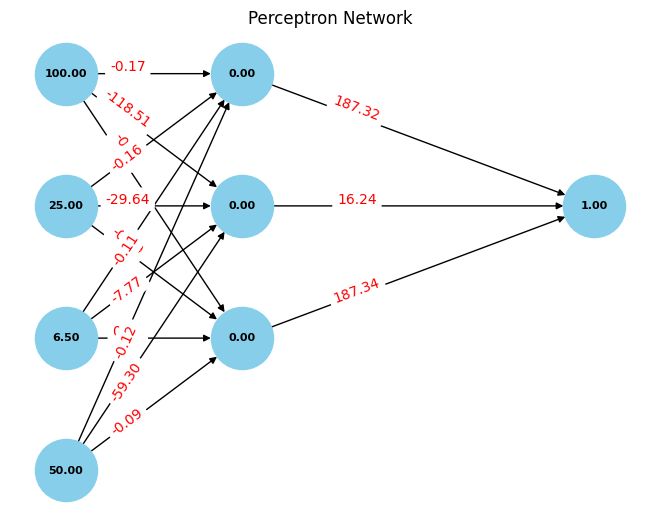

In [ ]:
layer_sizes = [4, 3, 1]  # 4 input features, 3 neurons in the hidden layer, 1 output neuron
weights = [
    np.random.rand(3, 4) * 0.2 - 0.1,  # 3 neurons in hidden layer, 4 input features
    np.random.rand(1, 3) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Biases for 3 neurons in hidden layer
    np.random.rand(1) * 0.2 - 0.1   # Bias for output layer
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

# Input data (4 features) and the expected output (target value)
input_data = [100, 25, 6.5, 50]  # Example input: 100mm rainfall, 25°C, pH 6.5, 50kg fertilizer

# Show both graphs
perceptron.show_both_graphs(input_data, [3000])  # Train with target crop yield (kg)

### Example 2: Predicting House Prices

Inputs: Number of Bedrooms (X₁), Square Footage (X₂), Age of House (Years) (X₃), Distance to City Center (km) (X₄), Number of Bathrooms (X₅)


Initial Forward Pass:
Initial input: [   4 1500   20   10    2]

Weights for layer 1:
[[ 0.03711903  0.05161221  0.09191674  0.03029246 -0.01866069]
 [-0.02500602 -0.0310599  -0.09716916  0.04301175 -0.09104675]
 [ 0.03642092 -0.03427857 -0.0363661  -0.09251964 -0.001309  ]
 [ 0.03044784  0.00811777  0.06491168 -0.06564473  0.06388325]]

Bias for layer 1:
[ 0.01426303 -0.03797923  0.07278358  0.07014208]

Dot product of layer 1 (plus bias):
[ 79.68499622 -48.42320886 -52.85452009  13.13813405]

Outputs of layer 1 after activation:
[1.00000000e+00 9.33399570e-22 1.11064070e-23 9.99998031e-01]

Weights for layer 2:
[[ 0.07117594  0.08026722 -0.03353734 -0.05816143]
 [ 0.02814026 -0.00805211 -0.04511309  0.02936014]]

Bias for layer 2:
[-0.03819039  0.01274489]

Dot product of layer 2 (plus bias):
[-0.02517576  0.07024524]

Outputs of layer 2 after activation:
[0.49370639 0.51755409]

Weights for layer 3:
[[0.04133481 0.08947343]]

Bias for layer 3:
[0.00192433]

Dot product of layer 3 (

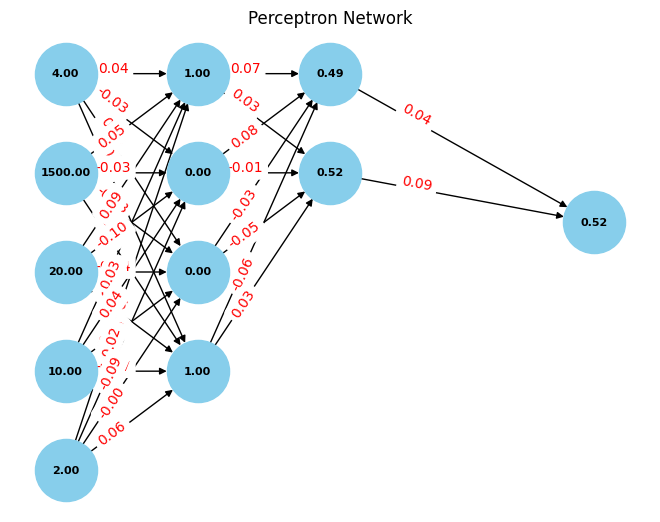


Training (Backpropagation and Weight Update):
Initial input: [   4 1500   20   10    2]

Weights for layer 1:
[[ 0.03711903  0.05161221  0.09191674  0.03029246 -0.01866069]
 [-0.02500602 -0.0310599  -0.09716916  0.04301175 -0.09104675]
 [ 0.03642092 -0.03427857 -0.0363661  -0.09251964 -0.001309  ]
 [ 0.03044784  0.00811777  0.06491168 -0.06564473  0.06388325]]

Bias for layer 1:
[ 0.01426303 -0.03797923  0.07278358  0.07014208]

Dot product of layer 1 (plus bias):
[ 79.68499622 -48.42320886 -52.85452009  13.13813405]

Outputs of layer 1 after activation:
[1.00000000e+00 9.33399570e-22 1.11064070e-23 9.99998031e-01]

Weights for layer 2:
[[ 0.07117594  0.08026722 -0.03353734 -0.05816143]
 [ 0.02814026 -0.00805211 -0.04511309  0.02936014]]

Bias for layer 2:
[-0.03819039  0.01274489]

Dot product of layer 2 (plus bias):
[-0.02517576  0.07024524]

Outputs of layer 2 after activation:
[0.49370639 0.51755409]

Weights for layer 3:
[[0.04133481 0.08947343]]

Bias for layer 3:
[0.00192433]



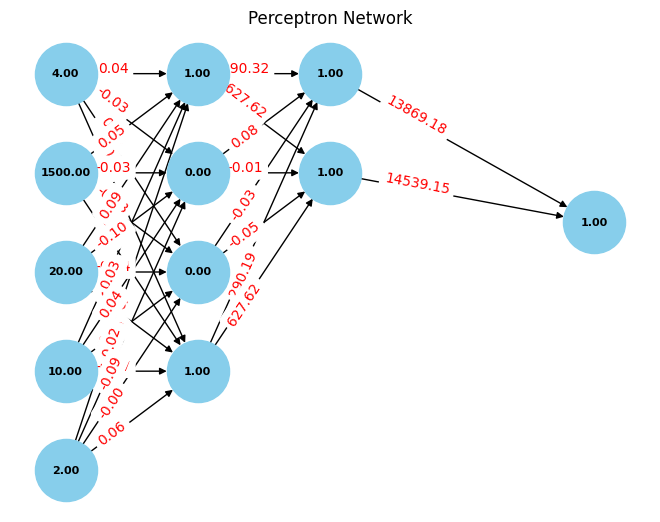

In [ ]:
layer_sizes = [5, 4, 2, 1]
weights = [
    np.random.rand(4, 5) * 0.2 - 0.1,  # 4 neurons, 5 inputs
    np.random.rand(2, 4) * 0.2 - 0.1,  # 2 neurons, 4 from the previous layer
    np.random.rand(1, 2) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(4) * 0.2 - 0.1,  # Biases for 4 neurons
    np.random.rand(2) * 0.2 - 0.1,  # Biases for 2 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for the output neuron
]
# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [4, 1500, 20, 10, 2]  # Example: 4 bedrooms, 1500 sq ft, 20 years old, 10km to city center, 2 bathrooms
perceptron.show_both_graphs(input_data, [450000])  # Target price (USD)

### Example 3: Predicting Car Mileage (MPG)

Inputs: Engine Size (L) (X₁), Horsepower (X₂), Weight (kg) (X₃), Age of Car (Years) (X₄)


Initial Forward Pass:
Initial input: [   3.5  200.  1500.     5. ]

Weights for layer 1:
[[ 0.04943739  0.00297508 -0.03913666  0.04266031]
 [-0.07290823 -0.08241283 -0.01756969  0.07814946]
 [-0.08730853  0.03477175  0.01405301  0.01410484]
 [ 0.0865642   0.02451294  0.02406897  0.07911002]
 [-0.00784355 -0.00854353  0.06389787 -0.00097562]]

Bias for layer 1:
[-0.04156454  0.06438637 -0.07018723 -0.0981177  -0.06200965]

Dot product of layer 1 (plus bias):
[-57.76520921 -42.63714075  27.72862371  41.60644425  94.04376296]

Outputs of layer 1 after activation:
[8.18254481e-26 3.04036028e-19 1.00000000e+00 1.00000000e+00
 1.00000000e+00]

Weights for layer 2:
[[-0.05166345 -0.02266619  0.02997892  0.06486149  0.06440119]
 [-0.00361624  0.0863295  -0.08436061  0.01455606 -0.09239422]
 [-0.04976529 -0.09639361  0.02762647 -0.04418407 -0.06502476]]

Bias for layer 2:
[-0.0855366   0.0298191  -0.03153563]

Dot product of layer 2 (plus bias):
[ 0.073705   -0.13237968 -0.11311798]

Outputs 

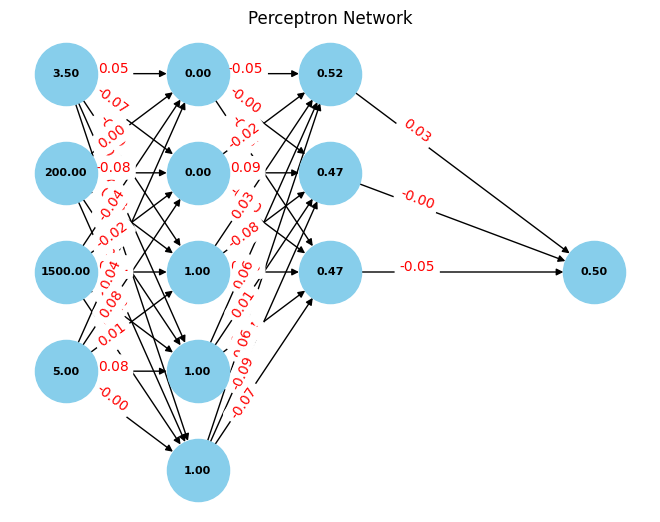


Training (Backpropagation and Weight Update):
Initial input: [   3.5  200.  1500.     5. ]

Weights for layer 1:
[[ 0.04943739  0.00297508 -0.03913666  0.04266031]
 [-0.07290823 -0.08241283 -0.01756969  0.07814946]
 [-0.08730853  0.03477175  0.01405301  0.01410484]
 [ 0.0865642   0.02451294  0.02406897  0.07911002]
 [-0.00784355 -0.00854353  0.06389787 -0.00097562]]

Bias for layer 1:
[-0.04156454  0.06438637 -0.07018723 -0.0981177  -0.06200965]

Dot product of layer 1 (plus bias):
[-57.76520921 -42.63714075  27.72862371  41.60644425  94.04376296]

Outputs of layer 1 after activation:
[8.18254481e-26 3.04036028e-19 1.00000000e+00 1.00000000e+00
 1.00000000e+00]

Weights for layer 2:
[[-0.05166345 -0.02266619  0.02997892  0.06486149  0.06440119]
 [-0.00361624  0.0863295  -0.08436061  0.01455606 -0.09239422]
 [-0.04976529 -0.09639361  0.02762647 -0.04418407 -0.06502476]]

Bias for layer 2:
[-0.0855366   0.0298191  -0.03153563]

Dot product of layer 2 (plus bias):
[ 0.073705   -0.1323796

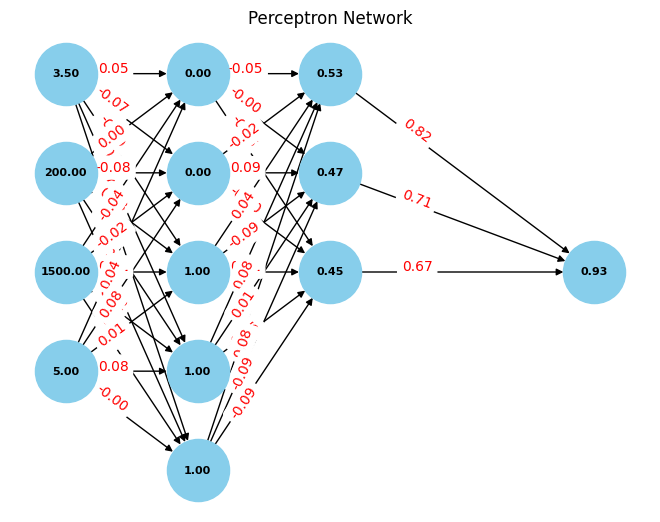

In [ ]:
layer_sizes = [4, 5, 3, 1]
weights = [
    np.random.rand(5, 4) * 0.2 - 0.1,  # 5 neurons, 4 inputs
    np.random.rand(3, 5) * 0.2 - 0.1,  # 3 neurons, 5 from the previous layer
    np.random.rand(1, 3) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(5) * 0.2 - 0.1,  # Biases for 5 neurons
    np.random.rand(3) * 0.2 - 0.1,  # Biases for 3 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for the output neuron
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [3.5, 200, 1500, 5]  # Example: 3.5L engine, 200hp, 1500kg weight, 5 years old
perceptron.show_both_graphs(input_data, [25])  # Target: 25 MPG

### Example 4: Predicting Electricity Consumption (kWh)

Inputs: Number of Rooms (X₁), Total Appliance Wattage (X₂), Hours of Usage per Day (X₃), Number of Occupants (X₄), Outdoor Temperature (°C) (X₅)


Initial Forward Pass:
Initial input: [   4 5000    8    3   30]

Weights for layer 1:
[[-0.00366787  0.00012462  0.01753902 -0.00476907 -0.08428984]
 [ 0.00582134  0.01794414  0.01951256  0.04261252  0.05086478]
 [ 0.08124264 -0.00950049 -0.02306667  0.09707657 -0.09155738]
 [-0.07019986  0.07736125 -0.01285152  0.01635572  0.05143874]
 [ 0.05296771 -0.04301481 -0.03912807  0.09671405  0.05229787]
 [-0.07912952 -0.05708114 -0.09866732  0.02547018  0.04119919]]

Bias for layer 1:
[-0.04185407  0.0616883   0.05838054  0.04163335 -0.02979204  0.08558118]

Dot product of layer 1 (plus bias):
[  -1.8361223    91.61556213  -49.75910095  388.05649714 -213.34593673
 -285.11360807]

Outputs of layer 1 after activation:
[1.37510548e-001 1.00000000e+000 2.45412699e-022 1.00000000e+000
 2.21328297e-093 1.50221917e-124]

Weights for layer 2:
[[-0.0803593  -0.09795326  0.0338397   0.09060045 -0.09529018 -0.0965766 ]
 [-0.02710301 -0.02322158  0.07468308 -0.04491899  0.04826411 -0.08957975]
 [-0.095

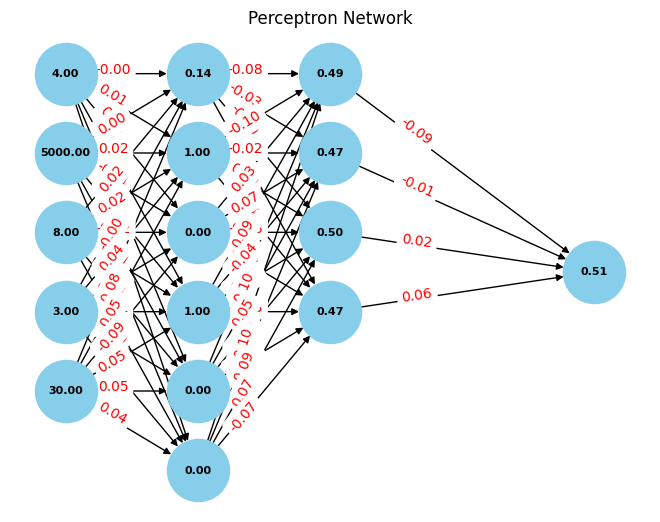


Training (Backpropagation and Weight Update):
Initial input: [   4 5000    8    3   30]

Weights for layer 1:
[[-0.00366787  0.00012462  0.01753902 -0.00476907 -0.08428984]
 [ 0.00582134  0.01794414  0.01951256  0.04261252  0.05086478]
 [ 0.08124264 -0.00950049 -0.02306667  0.09707657 -0.09155738]
 [-0.07019986  0.07736125 -0.01285152  0.01635572  0.05143874]
 [ 0.05296771 -0.04301481 -0.03912807  0.09671405  0.05229787]
 [-0.07912952 -0.05708114 -0.09866732  0.02547018  0.04119919]]

Bias for layer 1:
[-0.04185407  0.0616883   0.05838054  0.04163335 -0.02979204  0.08558118]

Dot product of layer 1 (plus bias):
[  -1.8361223    91.61556213  -49.75910095  388.05649714 -213.34593673
 -285.11360807]

Outputs of layer 1 after activation:
[1.37510548e-001 1.00000000e+000 2.45412699e-022 1.00000000e+000
 2.21328297e-093 1.50221917e-124]

Weights for layer 2:
[[-0.0803593  -0.09795326  0.0338397   0.09060045 -0.09529018 -0.0965766 ]
 [-0.02710301 -0.02322158  0.07468308 -0.04491899  0.048264

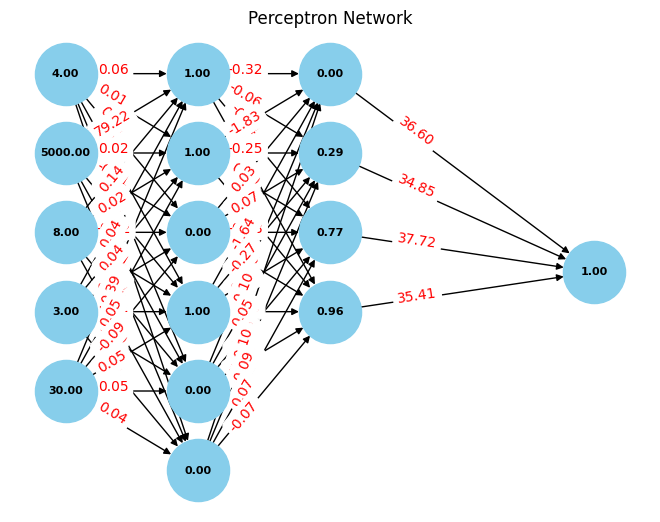

In [ ]:
layer_sizes = [5, 6, 4, 1]
weights = [
    np.random.rand(6, 5) * 0.2 - 0.1,  # 6 neurons, 5 inputs
    np.random.rand(4, 6) * 0.2 - 0.1,  # 4 neurons, 6 from the previous layer
    np.random.rand(1, 4) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(6) * 0.2 - 0.1,  # Biases for 6 neurons
    np.random.rand(4) * 0.2 - 0.1,  # Biases for 4 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for the output neuron
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [4, 5000, 8, 3, 30]  # Example: 4 rooms, 5000W appliances, 8 hours/day, 3 people, 30°C outdoor temp
perceptron.show_both_graphs(input_data, [1200])  # Target electricity consumption in kWh

### Example 5: Predicting Student Test Scores

Inputs: Study Hours (X₁), Sleep Hours (X₂), Class Attendance (%) (X₃), Stress Level (1-10) (X₄), Practice Tests Taken (X₅), Parent Education Level (1-5) (X₆)


Initial Forward Pass:
Initial input: [ 6  7 90  3  2  4]

Weights for layer 1:
[[ 0.01868246 -0.04511435 -0.09429916  0.07589039  0.04196298  0.01468756]
 [-0.01297256 -0.09571324 -0.02844432 -0.08643726 -0.02925897  0.00078844]
 [ 0.06385308 -0.04667491  0.00925452 -0.01874058 -0.0571573  -0.07809549]
 [ 0.04373767 -0.03704423  0.0939981  -0.08055096 -0.06004346  0.09105858]
 [ 0.08016098 -0.07491533 -0.03939633  0.05322666  0.02415624 -0.02010717]]

Bias for layer 1:
[ 0.07410155 -0.09020233 -0.09338515  0.06726542  0.0149492 ]

Dot product of layer 1 (plus bias):
[-8.24618114 -3.71269539  0.31299788  8.53270556 -3.44659848]

Outputs of layer 1 after activation:
[2.62189413e-04 2.38299087e-02 5.77616840e-01 9.99803117e-01
 3.08704621e-02]

Weights for layer 2:
[[-0.09298383  0.0607591  -0.05274695  0.01431991  0.06222096]
 [-0.04942799 -0.09300259  0.01576043 -0.04443744  0.00065343]
 [-0.09264303  0.04910298  0.07980371  0.08495289 -0.01202461]
 [-0.02702712 -0.02309273  0.06037658

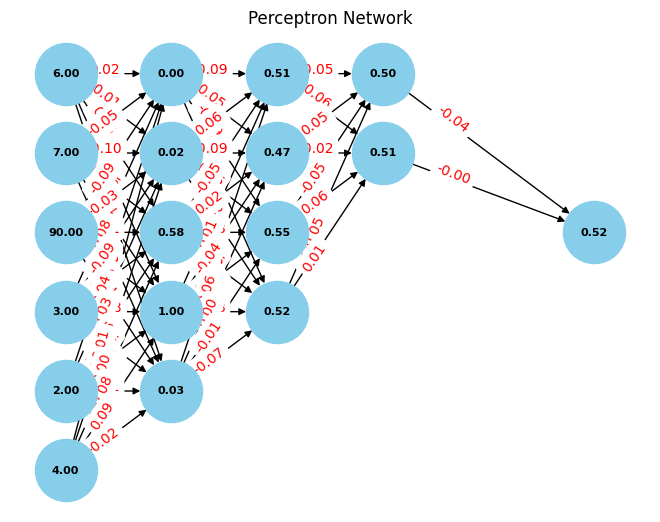


Training (Backpropagation and Weight Update):
Initial input: [ 6  7 90  3  2  4]

Weights for layer 1:
[[ 0.01868246 -0.04511435 -0.09429916  0.07589039  0.04196298  0.01468756]
 [-0.01297256 -0.09571324 -0.02844432 -0.08643726 -0.02925897  0.00078844]
 [ 0.06385308 -0.04667491  0.00925452 -0.01874058 -0.0571573  -0.07809549]
 [ 0.04373767 -0.03704423  0.0939981  -0.08055096 -0.06004346  0.09105858]
 [ 0.08016098 -0.07491533 -0.03939633  0.05322666  0.02415624 -0.02010717]]

Bias for layer 1:
[ 0.07410155 -0.09020233 -0.09338515  0.06726542  0.0149492 ]

Dot product of layer 1 (plus bias):
[-8.24618114 -3.71269539  0.31299788  8.53270556 -3.44659848]

Outputs of layer 1 after activation:
[2.62189413e-04 2.38299087e-02 5.77616840e-01 9.99803117e-01
 3.08704621e-02]

Weights for layer 2:
[[-0.09298383  0.0607591  -0.05274695  0.01431991  0.06222096]
 [-0.04942799 -0.09300259  0.01576043 -0.04443744  0.00065343]
 [-0.09264303  0.04910298  0.07980371  0.08495289 -0.01202461]
 [-0.02702712

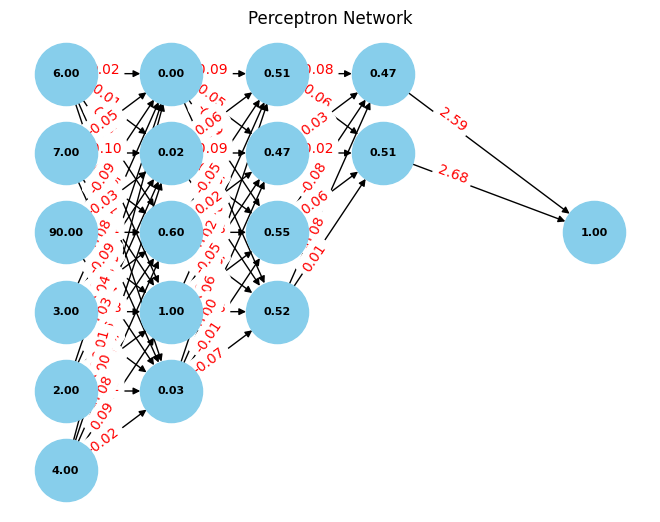

In [ ]:
layer_sizes = [6, 5, 4, 2, 1]
weights = [
    np.random.rand(5, 6) * 0.2 - 0.1,  # 5 neurons, 6 inputs
    np.random.rand(4, 5) * 0.2 - 0.1,  # 4 neurons, 5 from the previous layer
    np.random.rand(2, 4) * 0.2 - 0.1,  # 2 neurons, 4 from the previous layer
    np.random.rand(1, 2) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(5) * 0.2 - 0.1,  # Biases for 5 neurons
    np.random.rand(4) * 0.2 - 0.1,  # Biases for 4 neurons
    np.random.rand(2) * 0.2 - 0.1,  # Biases for 2 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for the output neuron
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [6, 7, 90, 3, 2, 4]  # Example: 6 hours of study, 7 hours of sleep, 90% attendance, stress level 3, 2 practice tests, parent education level 4
perceptron.show_both_graphs(input_data, [85])  # Target test score


## BACKWARD PROPOGATION - Classification Examples

### Example 6: Predicting Whether a Student Passes an Exam

Inputs: Study Hours (X₁), Class Attendance (%) (X₂), Sleep Hours (X₃), Practice Tests Taken (X₄)



Initial Forward Pass:
Initial input: [ 6 85  7  2]

Weights for layer 1:
[[-0.01615429 -0.09623318 -0.0456471  -0.04725106]
 [-0.03016813  0.07985004 -0.06722428 -0.05073016]
 [ 0.03746909  0.0501778  -0.07521587 -0.09698975]]

Bias for layer 1:
[ 0.04848    -0.05118205  0.01010544]

Dot product of layer 1 (plus bias):
[-8.64229759  5.98303213  3.7795428 ]

Outputs of layer 1 after activation:
[1.76449814e-04 9.97485170e-01 9.77676585e-01]

Weights for layer 2:
[[ 0.08916591  0.04555931 -0.00303204]]

Bias for layer 2:
[-0.07252227]

Dot product of layer 2 (plus bias):
[-0.03002615]

Outputs of Output Layer after activation:
[0.49249403]

Graph before backpropagation:


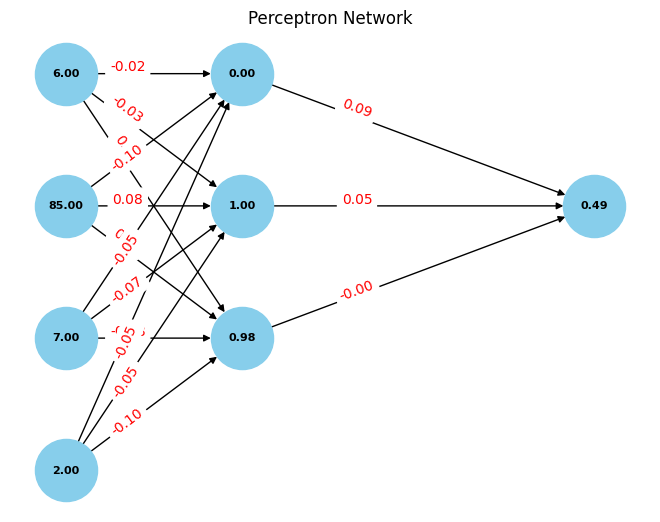


Training (Backpropagation and Weight Update):
Initial input: [ 6 85  7  2]

Weights for layer 1:
[[-0.01615429 -0.09623318 -0.0456471  -0.04725106]
 [-0.03016813  0.07985004 -0.06722428 -0.05073016]
 [ 0.03746909  0.0501778  -0.07521587 -0.09698975]]

Bias for layer 1:
[ 0.04848    -0.05118205  0.01010544]

Dot product of layer 1 (plus bias):
[-8.64229759  5.98303213  3.7795428 ]

Outputs of layer 1 after activation:
[1.76449814e-04 9.97485170e-01 9.77676585e-01]

Weights for layer 2:
[[ 0.08916591  0.04555931 -0.00303204]]

Bias for layer 2:
[-0.07252227]

Dot product of layer 2 (plus bias):
[-0.03002615]

Outputs of Output Layer after activation:
[0.49249403]

Old Weights and Biases:
Layer 1 weights:
 [[-0.01615429 -0.09623318 -0.0456471  -0.04725106]
 [-0.03016813  0.07985004 -0.06722428 -0.05073016]
 [ 0.03746909  0.0501778  -0.07521587 -0.09698975]]
Layer 1 biases:
 [ 0.04848    -0.05118205  0.01010544]
Layer 2 weights:
 [[ 0.08916591  0.04555931 -0.00303204]]
Layer 2 biases:
 [-

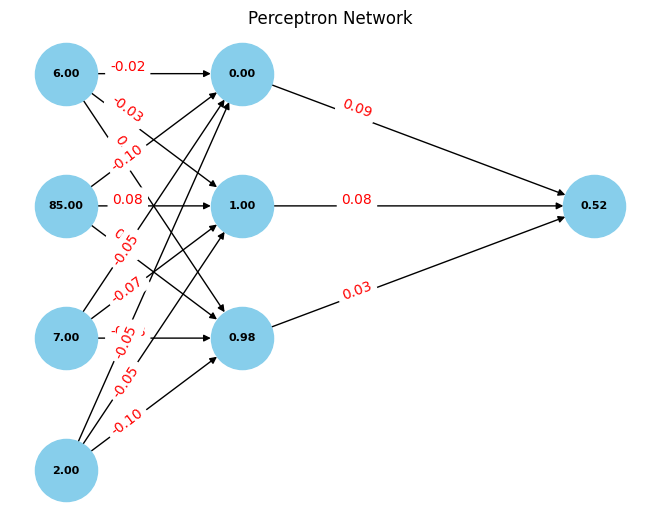

In [ ]:
layer_sizes = [4, 3, 1]
weights = [
    np.random.rand(3, 4) * 0.2 - 0.1,  # 3 neurons, 4 input features
    np.random.rand(1, 3) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Biases for 3 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for output layer
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [6, 85, 7, 2]  # Example: 6 hours of study, 85% attendance, 7 hours of sleep, 2 practice tests taken
perceptron.show_both_graphs(input_data, [1])  # Target: 1 for Pass, 0 for Fail

### Example 7: Classifying if a Transaction is Fraudulent

Inputs: Transaction Amount (USD) (X₁), Time of Day (24h format) (X₂), User's Age (X₃), User Location (X₄)


Initial Forward Pass:
Initial input: [150  13  35   2]

Weights for layer 1:
[[-0.0226338   0.08098698  0.06357107 -0.0385333 ]
 [-0.01695704  0.03637072  0.01099157 -0.04267434]
 [ 0.07088361  0.05952588  0.07872359  0.06643659]]

Bias for layer 1:
[-0.01659484  0.03664874  0.01389729]

Dot product of layer 1 (plus bias):
[-0.2109128  -1.73473215 14.30847358]

Outputs of layer 1 after activation:
[0.4474664  0.14998329 0.99999939]

Weights for layer 2:
[[ 0.03921793  0.0180519  -0.06361658]
 [ 0.0232242  -0.08536843 -0.01661321]]

Bias for layer 2:
[-0.04584603 -0.06767227]

Dot product of layer 2 (plus bias):
[-0.08920638 -0.08669726]

Outputs of layer 2 after activation:
[0.47771318 0.47833925]

Weights for layer 3:
[[-0.01768834 -0.05856373]]

Bias for layer 3:
[-0.04793031]

Dot product of layer 3 (plus bias):
[-0.08439359]

Outputs of Output Layer after activation:
[0.47891411]

Graph before backpropagation:


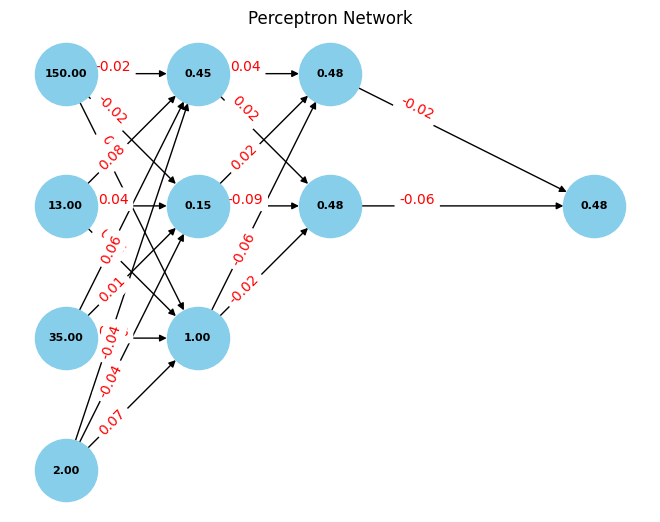


Training (Backpropagation and Weight Update):
Initial input: [150  13  35   2]

Weights for layer 1:
[[-0.0226338   0.08098698  0.06357107 -0.0385333 ]
 [-0.01695704  0.03637072  0.01099157 -0.04267434]
 [ 0.07088361  0.05952588  0.07872359  0.06643659]]

Bias for layer 1:
[-0.01659484  0.03664874  0.01389729]

Dot product of layer 1 (plus bias):
[-0.2109128  -1.73473215 14.30847358]

Outputs of layer 1 after activation:
[0.4474664  0.14998329 0.99999939]

Weights for layer 2:
[[ 0.03921793  0.0180519  -0.06361658]
 [ 0.0232242  -0.08536843 -0.01661321]]

Bias for layer 2:
[-0.04584603 -0.06767227]

Dot product of layer 2 (plus bias):
[-0.08920638 -0.08669726]

Outputs of layer 2 after activation:
[0.47771318 0.47833925]

Weights for layer 3:
[[-0.01768834 -0.05856373]]

Bias for layer 3:
[-0.04793031]

Dot product of layer 3 (plus bias):
[-0.08439359]

Outputs of Output Layer after activation:
[0.47891411]

Old Weights and Biases:
Layer 1 weights:
 [[-0.0226338   0.08098698  0.063571

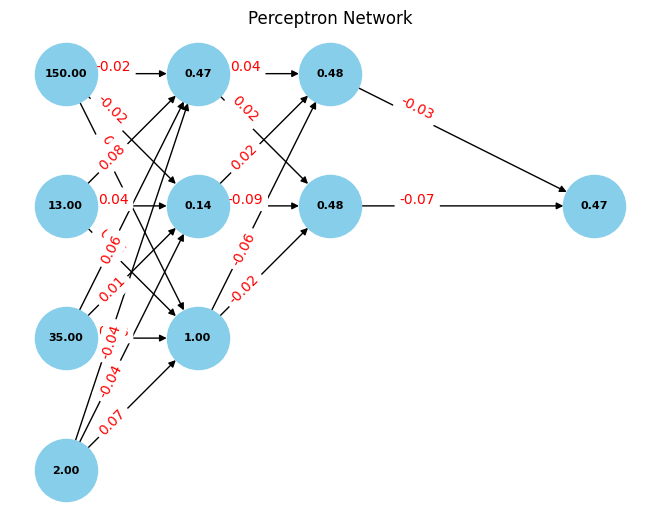

In [ ]:
layer_sizes = [4, 3, 2, 1]
weights = [
    np.random.rand(3, 4) * 0.2 - 0.1,  # 3 neurons, 4 inputs
    np.random.rand(2, 3) * 0.2 - 0.1,  # 2 neurons, 3 from the previous layer
    np.random.rand(1, 2) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Biases for 3 neurons
    np.random.rand(2) * 0.2 - 0.1,  # Biases for 2 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for output layer
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [150, 13, 35, 2]  # Example: $150, transaction at 13:00, 35-year-old user, location code 2
perceptron.show_both_graphs(input_data, [0])  # Target: 0 for not fraud, 1 for fraud

### Example 8: Classifying Tumor as Benign or Malignant

Inputs: Tumor Size (cm) (X₁), Age of Patient (Years) (X₂), Number of Affected Lymph Nodes (X₃), Tumor Location (X₄), Hormone Level (X₅)


Initial Forward Pass:
Initial input: [ 2 45  3  1 15]

Weights for layer 1:
[[-0.02248947  0.01584472  0.05679431 -0.03820185 -0.07013742]
 [-0.095116   -0.07392975 -0.03288818  0.08615368 -0.03362434]
 [-0.053584    0.0241822  -0.0476398  -0.00884455  0.07769772]
 [ 0.0674099  -0.08937219 -0.08383179  0.05586851 -0.07361394]]

Bias for layer 1:
[ 0.04820594  0.00110836  0.09328587 -0.00943666]

Dot product of layer 1 (plus bias):
[-0.20364096 -4.03283843  2.08801882 -5.19620145]

Outputs of layer 1 after activation:
[0.44926497 0.01741528 0.88973321 0.00550706]

Weights for layer 2:
[[ 0.03290864  0.06050309 -0.08481107 -0.06706316]
 [ 0.06236289  0.06296772  0.07319178  0.04869935]]

Bias for layer 2:
[-0.07077508  0.03872283]

Dot product of layer 2 (plus bias):
[-0.13076525  0.13322625]

Outputs of layer 2 after activation:
[0.46735519 0.53325739]

Weights for layer 3:
[[ 0.04507556 -0.05090827]]

Bias for layer 3:
[0.07864634]

Dot product of layer 3 (plus bias):
[0.07256543]

Ou

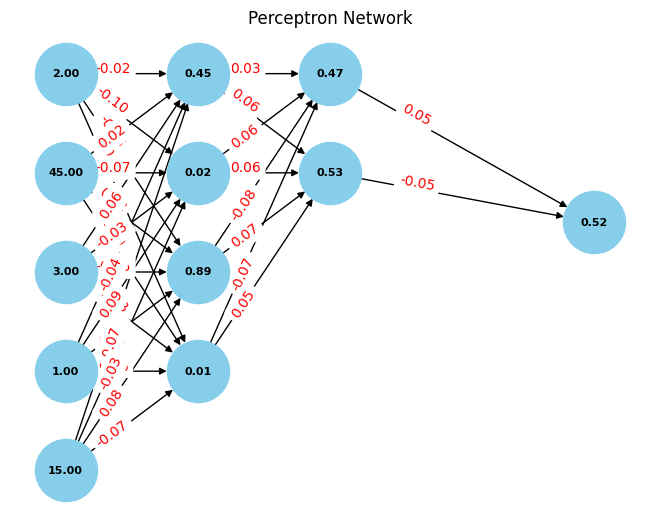


Training (Backpropagation and Weight Update):
Initial input: [ 2 45  3  1 15]

Weights for layer 1:
[[-0.02248947  0.01584472  0.05679431 -0.03820185 -0.07013742]
 [-0.095116   -0.07392975 -0.03288818  0.08615368 -0.03362434]
 [-0.053584    0.0241822  -0.0476398  -0.00884455  0.07769772]
 [ 0.0674099  -0.08937219 -0.08383179  0.05586851 -0.07361394]]

Bias for layer 1:
[ 0.04820594  0.00110836  0.09328587 -0.00943666]

Dot product of layer 1 (plus bias):
[-0.20364096 -4.03283843  2.08801882 -5.19620145]

Outputs of layer 1 after activation:
[0.44926497 0.01741528 0.88973321 0.00550706]

Weights for layer 2:
[[ 0.03290864  0.06050309 -0.08481107 -0.06706316]
 [ 0.06236289  0.06296772  0.07319178  0.04869935]]

Bias for layer 2:
[-0.07077508  0.03872283]

Dot product of layer 2 (plus bias):
[-0.13076525  0.13322625]

Outputs of layer 2 after activation:
[0.46735519 0.53325739]

Weights for layer 3:
[[ 0.04507556 -0.05090827]]

Bias for layer 3:
[0.07864634]

Dot product of layer 3 (plus

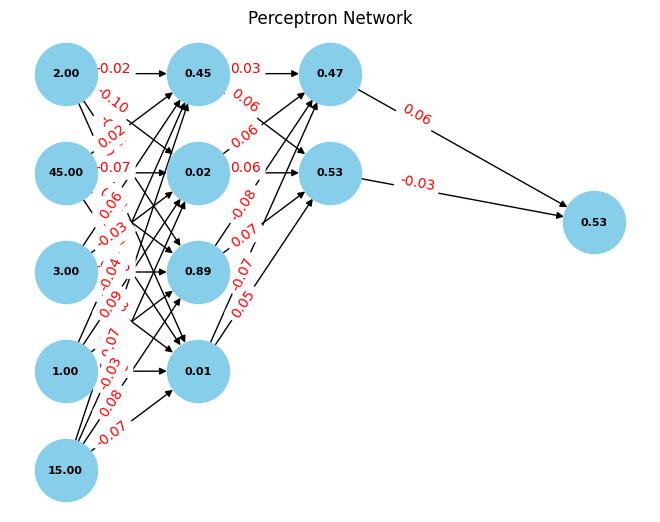

In [ ]:
layer_sizes = [5, 4, 2, 1]

weights = [
    np.random.rand(4, 5) * 0.2 - 0.1,  # 4 neurons, 5 inputs
    np.random.rand(2, 4) * 0.2 - 0.1,  # 2 neurons, 4 from the previous layer
    np.random.rand(1, 2) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(4) * 0.2 - 0.1,  # Biases for 4 neurons
    np.random.rand(2) * 0.2 - 0.1,  # Biases for 2 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for output layer
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [2, 45, 3, 1, 15]  # Example: 2cm tumor, 45-year-old patient, 3 lymph nodes, location code 1, hormone level 15
perceptron.show_both_graphs(input_data, [1])  # Target: 1 for malignant, 0 for benign

### Example 9: Predicting Customer Churn (Leave/Stay)

Inputs: Monthly Subscription Cost (X₁), Customer Age (X₂), Months as a Customer (X₃), Number of Complaints (X₄), Customer Satisfaction Score (1-10) (X₅)


Initial Forward Pass:
Initial input: [50 30 24  2  8]

Weights for layer 1:
[[ 0.07398549  0.01944933 -0.02338983  0.02853632  0.09788552]
 [ 0.07972446  0.0980361  -0.06569497 -0.07869948  0.02260458]
 [-0.09784873 -0.00607068 -0.05334876 -0.07546013 -0.03898443]]

Bias for layer 1:
[ 0.09057115 -0.01600003 -0.02226403]

Dot product of layer 1 (plus bias):
[ 4.65212669  5.35806428 -6.83998674]

Outputs of layer 1 after activation:
[0.99054889 0.99531207 0.00106897]

Weights for layer 2:
[[-0.08918893 -0.02035918 -0.00319622]]

Bias for layer 2:
[0.04235124]

Dot product of layer 2 (plus bias):
[-0.06626191]

Outputs of Output Layer after activation:
[0.48344058]

Graph before backpropagation:


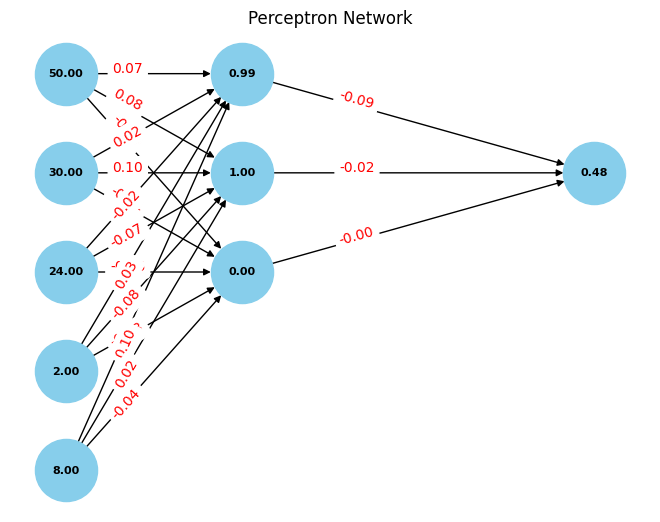


Training (Backpropagation and Weight Update):
Initial input: [50 30 24  2  8]

Weights for layer 1:
[[ 0.07398549  0.01944933 -0.02338983  0.02853632  0.09788552]
 [ 0.07972446  0.0980361  -0.06569497 -0.07869948  0.02260458]
 [-0.09784873 -0.00607068 -0.05334876 -0.07546013 -0.03898443]]

Bias for layer 1:
[ 0.09057115 -0.01600003 -0.02226403]

Dot product of layer 1 (plus bias):
[ 4.65212669  5.35806428 -6.83998674]

Outputs of layer 1 after activation:
[0.99054889 0.99531207 0.00106897]

Weights for layer 2:
[[-0.08918893 -0.02035918 -0.00319622]]

Bias for layer 2:
[0.04235124]

Dot product of layer 2 (plus bias):
[-0.06626191]

Outputs of Output Layer after activation:
[0.48344058]

Old Weights and Biases:
Layer 1 weights:
 [[ 0.07398549  0.01944933 -0.02338983  0.02853632  0.09788552]
 [ 0.07972446  0.0980361  -0.06569497 -0.07869948  0.02260458]
 [-0.09784873 -0.00607068 -0.05334876 -0.07546013 -0.03898443]]
Layer 1 biases:
 [ 0.09057115 -0.01600003 -0.02226403]
Layer 2 weights

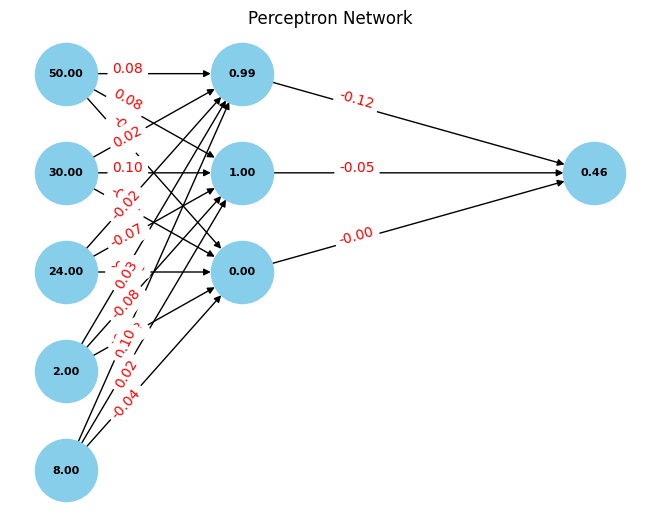

In [ ]:
layer_sizes = [5, 3, 1]
weights = [
    np.random.rand(3, 5) * 0.2 - 0.1,  # 3 neurons, 5 inputs
    np.random.rand(1, 3) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(3) * 0.2 - 0.1,  # Biases for 3 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for output layer
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [50, 30, 24, 2, 8]  # Example: $50/month, 30 years old, 24 months as customer, 2 complaints, satisfaction score of 8
perceptron.show_both_graphs(input_data, [0])  # Target: 0 for stay, 1 for leave


### Example 5: Classifying Email as Spam or Not Spam

Inputs: Length of Email (words) (X₁), Number of Links (X₂), Number of Attachments (X₃), Email Sent Time (24h format) (X₄), Number of Capital Letters (X₅), Sender Reputation Score (X₆)


Initial Forward Pass:
Initial input: [500   3   0  13  15  85]

Weights for layer 1:
[[-0.05232923 -0.02150399  0.07041086  0.09370851  0.01289504 -0.09046898]
 [ 0.04032434 -0.01826437 -0.0611267   0.08041287  0.07670641 -0.08547891]
 [ 0.00779408 -0.03011598 -0.01138796 -0.06391656  0.09939921 -0.05722111]
 [-0.03410993 -0.06174412  0.0216688  -0.06667524  0.06009667 -0.01326579]]

Bias for layer 1:
[ 0.00589958  0.08723609 -0.0105185   0.05700551]

Dot product of layer 1 (plus bias):
[-32.50145517  15.12486777  -0.40754779 -18.27611253]

Outputs of layer 1 after activation:
[7.67003539e-15 9.99999730e-01 3.99500261e-01 1.15554050e-08]

Weights for layer 2:
[[ 0.02619117  0.00788077  0.05383129  0.03566169]
 [-0.05801312 -0.00511669  0.00473361  0.04247851]]

Bias for layer 2:
[ 0.03338723 -0.05387463]

Dot product of layer 2 (plus bias):
[ 0.06277361 -0.05710024]

Outputs of layer 2 after activation:
[0.51568825 0.48572882]

Weights for layer 3:
[[-0.0438573   0.00073961]]

Bias fo

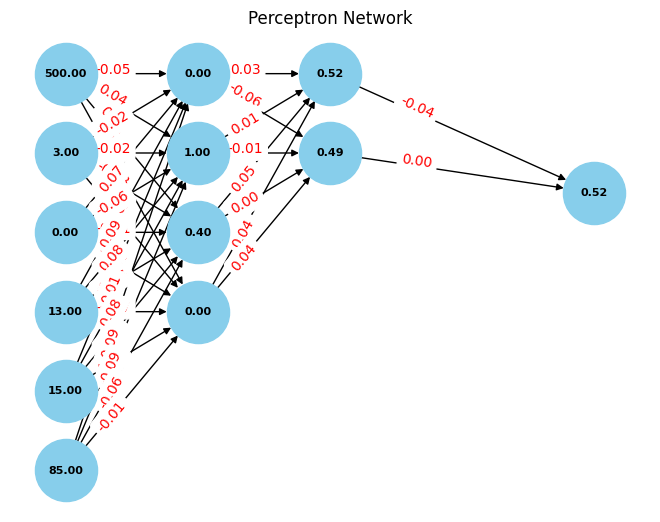


Training (Backpropagation and Weight Update):
Initial input: [500   3   0  13  15  85]

Weights for layer 1:
[[-0.05232923 -0.02150399  0.07041086  0.09370851  0.01289504 -0.09046898]
 [ 0.04032434 -0.01826437 -0.0611267   0.08041287  0.07670641 -0.08547891]
 [ 0.00779408 -0.03011598 -0.01138796 -0.06391656  0.09939921 -0.05722111]
 [-0.03410993 -0.06174412  0.0216688  -0.06667524  0.06009667 -0.01326579]]

Bias for layer 1:
[ 0.00589958  0.08723609 -0.0105185   0.05700551]

Dot product of layer 1 (plus bias):
[-32.50145517  15.12486777  -0.40754779 -18.27611253]

Outputs of layer 1 after activation:
[7.67003539e-15 9.99999730e-01 3.99500261e-01 1.15554050e-08]

Weights for layer 2:
[[ 0.02619117  0.00788077  0.05383129  0.03566169]
 [-0.05801312 -0.00511669  0.00473361  0.04247851]]

Bias for layer 2:
[ 0.03338723 -0.05387463]

Dot product of layer 2 (plus bias):
[ 0.06277361 -0.05710024]

Outputs of layer 2 after activation:
[0.51568825 0.48572882]

Weights for layer 3:
[[-0.0438573

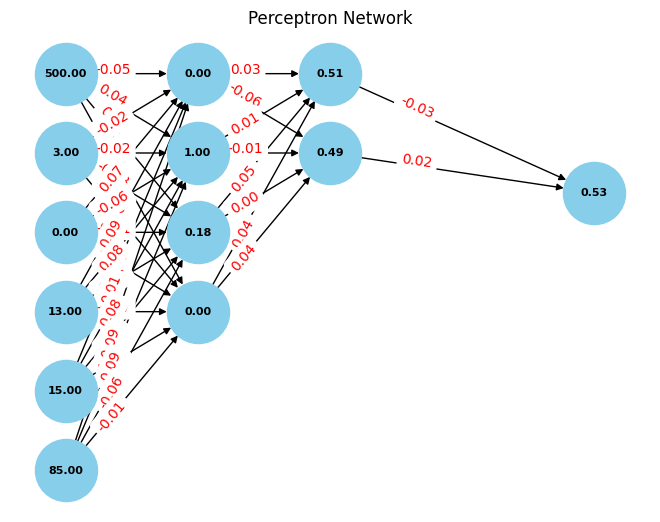

In [ ]:
layer_sizes = [6, 4, 2, 1]
weights = [
    np.random.rand(4, 6) * 0.2 - 0.1,  # 4 neurons, 6 inputs
    np.random.rand(2, 4) * 0.2 - 0.1,  # 2 neurons, 4 from the previous layer
    np.random.rand(1, 2) * 0.2 - 0.1   # 1 output neuron
]
biases = [
    np.random.rand(4) * 0.2 - 0.1,  # Biases for 4 neurons
    np.random.rand(2) * 0.2 - 0.1,  # Biases for 2 neurons
    np.random.rand(1) * 0.2 - 0.1   # Bias for output layer
]

# Create the perceptron
perceptron = Perceptron(layer_sizes, weights, biases)

input_data = [500, 3, 0, 13, 15, 85]  # Example: 500 words, 3 links, 0 attachments, sent at 13:00, 15 capital letters, sender score 85
perceptron.show_both_graphs(input_data, [1])  # Target: 1 for spam, 0 for not spam

## Gradient Descent - Examples

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### EXAMPLE 1 - Employee will Leave or Not

In [ ]:
# Load dataset from the specified path
data_path = r"/content/drive/MyDrive/Datasets/employee.csv"
df = pd.read_csv(data_path)

# Display the first few rows to understand the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
# Splitting features and labels
X = df.drop('left', axis=1)  # 'left' is the target variable
y = df['left']

# One-hot encoding for the categorical columns ('department', 'salary')
X = pd.get_dummies(X, columns=['department', 'salary'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Defining a simple neural network model before applying gradient descent
model_before = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 output unit for binary classification
])

# Compile the model (before applying gradient descent)
model_before.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_before = model_before.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6186 - loss: 0.6716 - val_accuracy: 0.7740 - val_loss: 0.5072
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4857 - val_accuracy: 0.8057 - val_loss: 0.4518
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8106 - loss: 0.4435 - val_accuracy: 0.8193 - val_loss: 0.4203
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8250 - loss: 0.4128 - val_accuracy: 0.8283 - val_loss: 0.3972
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8266 - loss: 0.3926 - val_accuracy: 0.8387 - val_loss: 0.3770
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 0.3642 - val_accuracy: 0.8503 - val_loss: 0.3572
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8527 - loss: 0.3418 - val_accuracy: 0.8577 - val_loss: 0.3373
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8556 - loss: 0.3275 - val_accuracy: 0.8687 - val_

In [ ]:
# Evaluate the model's performance before applying gradient descent
loss_before, accuracy_before = model_before.evaluate(X_test, y_test)
print(f"Loss before Gradient Descent: {loss_before}")
print(f"Accuracy before Gradient Descent: {accuracy_before}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8839 - loss: 0.2836
Loss before Gradient Descent: 0.27541983127593994
Accuracy before Gradient Descent: 0.890999972820282


In [ ]:
# Defining a model to be trained with Gradient Descent (Adam optimizer)
model_after = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 output unit for binary classification
])

# Compile the model with Adam optimizer
model_after.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with Adam optimizer
history_after = model_after.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6381 - loss: 0.6439 - val_accuracy: 0.7953 - val_loss: 0.4291
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8388 - loss: 0.3882 - val_accuracy: 0.8887 - val_loss: 0.3138
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9073 - loss: 0.2843 - val_accuracy: 0.9173 - val_loss: 0.2576
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.2315 - val_accuracy: 0.9280 - val_loss: 0.2266
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9354 - loss: 0.2015 - val_accuracy: 0.9323 - val_loss: 0.2077
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9407 - loss: 0.1875 - val_accuracy: 0.9387 - val_loss: 0.1975
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9479 - loss: 0.1776 - val_accuracy: 0.9417 - val_loss: 0.1888
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9422 - loss: 0.1835 - val_accuracy: 0.

In [ ]:
# Evaluate the model's performance after applying gradient descent
loss_after, accuracy_after = model_after.evaluate(X_test, y_test)
print(f"Loss after Gradient Descent: {loss_after}")
print(f"Accuracy after Gradient Descent: {accuracy_after}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9562 - loss: 0.1594
Loss after Gradient Descent: 0.16331472992897034
Accuracy after Gradient Descent: 0.9546666741371155


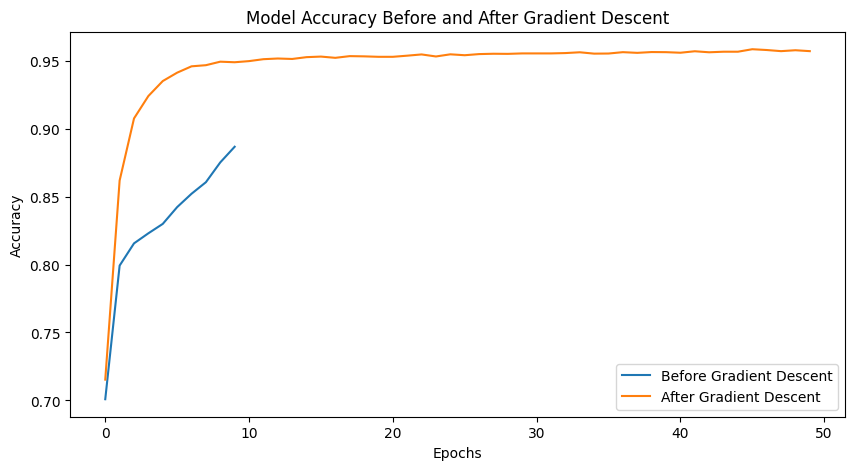

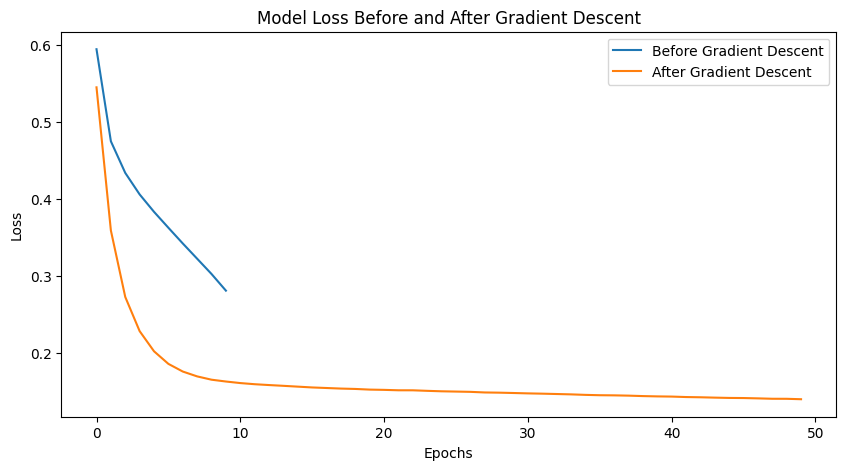

In [ ]:
# Plotting accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(history_before.history['accuracy'], label='Before Gradient Descent')
plt.plot(history_after.history['accuracy'], label='After Gradient Descent')
plt.title('Model Accuracy Before and After Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss comparison
plt.figure(figsize=(10, 5))
plt.plot(history_before.history['loss'], label='Before Gradient Descent')
plt.plot(history_after.history['loss'], label='After Gradient Descent')
plt.title('Model Loss Before and After Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### EXAMPLE 2 - Diabetes Prediction

In [ ]:
# Load dataset from the specified path
data_path = r"/content/drive/MyDrive/Datasets/diabetes.csv"
df = pd.read_csv(data_path)

# Display the first few rows to understand the dataset
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Splitting features and labels
X = df.drop('Class variable', axis=1)
y = df['Class variable']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Defining a simple neural network model before applying gradient descent
model_before = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 output unit for binary classification
])

# Compile the model (before applying gradient descent)
model_before.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_before = model_before.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5115 - loss: 0.7581 - val_accuracy: 0.5455 - val_loss: 0.7485
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5428 - loss: 0.7261 - val_accuracy: 0.6039 - val_loss: 0.7146
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5601 - loss: 0.6996 - val_accuracy: 0.6234 - val_loss: 0.6886
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 0.6603 - val_accuracy: 0.6688 - val_loss: 0.6686
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6454 - loss: 0.6424 - val_accuracy: 0.6623 - val_loss: 0.6517
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6790 - loss: 0.6127 - val_accuracy: 0.6558 - val_loss: 0.6363
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6911 - loss: 0.6041 - val_accuracy: 0.6688 - val_loss: 0.6244
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.6232 - val_accuracy: 0.6688 - val_loss: 0.6128
Ep

In [ ]:
# Evaluate the model's performance before applying gradient descent
loss_before, accuracy_before = model_before.evaluate(X_test, y_test)
print(f"Loss before Gradient Descent: {loss_before}")
print(f"Accuracy before Gradient Descent: {accuracy_before}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6574 - loss: 0.6298 
Loss before Gradient Descent: 0.594912588596344
Accuracy before Gradient Descent: 0.6883116960525513


In [ ]:
# Defining a model to be trained with Gradient Descent (Adam optimizer)
model_after = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 output unit for binary classification
])

# Compile the model with Adam optimizer
model_after.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with Adam optimizer
history_after = model_after.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3639 - loss: 1.0701 - val_accuracy: 0.3636 - val_loss: 1.0583
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3352 - loss: 1.0641 - val_accuracy: 0.3701 - val_loss: 0.9806
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3575 - loss: 0.9479 - val_accuracy: 0.3831 - val_loss: 0.9210
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3639 - loss: 0.9225 - val_accuracy: 0.3896 - val_loss: 0.8687
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3902 - loss: 0.8736 - val_accuracy: 0.4286 - val_loss: 0.8292
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4204 - loss: 0.8285 - val_accuracy: 0.4545 - val_loss: 0.7951
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4479 - loss: 0.7963 - val_accuracy: 0.4675 - val_loss: 0.7663
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4760 - loss: 0.7610 - val_accuracy: 0.5065 - val_loss

In [ ]:
# Evaluate the model's performance after applying gradient descent
loss_after, accuracy_after = model_after.evaluate(X_test, y_test)
print(f"Loss after Gradient Descent: {loss_after}")
print(f"Accuracy after Gradient Descent: {accuracy_after}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7632 - loss: 0.5483 
Loss after Gradient Descent: 0.539784848690033
Accuracy after Gradient Descent: 0.7792207598686218


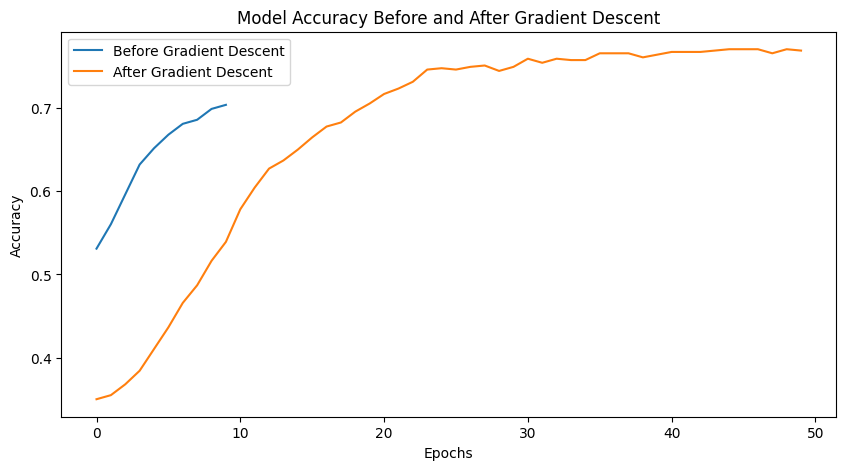

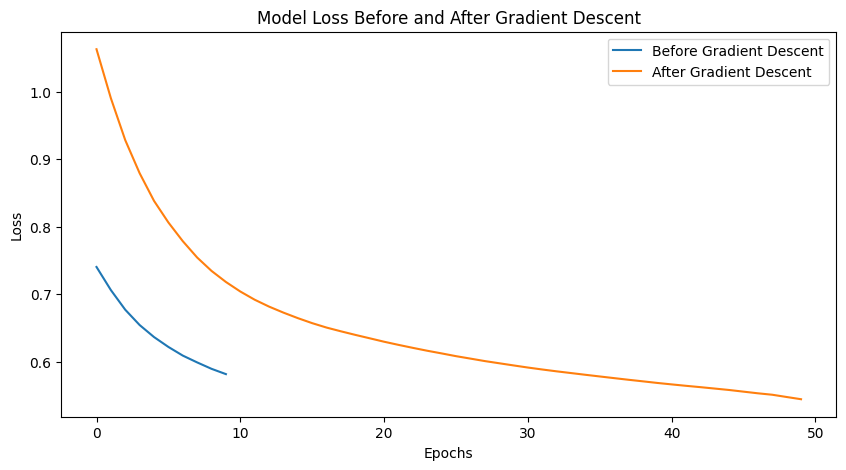

In [ ]:
# Plotting accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(history_before.history['accuracy'], label='Before Gradient Descent')
plt.plot(history_after.history['accuracy'], label='After Gradient Descent')
plt.title('Model Accuracy Before and After Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss comparison
plt.figure(figsize=(10, 5))
plt.plot(history_before.history['loss'], label='Before Gradient Descent')
plt.plot(history_after.history['loss'], label='After Gradient Descent')
plt.title('Model Loss Before and After Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### EXAMPLE 3 - Cancer Prediction

In [ ]:
# Load dataset from the specified path
data_path = r"/content/drive/MyDrive/Datasets/cancer.csv"
df = pd.read_csv(data_path)

# Display the first few rows to understand the dataset
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [ ]:
# Splitting features and labels
X = df.drop('Class', axis=1)
y = df['Class']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Defining a simple neural network model before applying gradient descent
model_before = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 output unit for binary classification
])

# Compile the model (before applying gradient descent)
model_before.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_before = model_before.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8319 - loss: 0.5460 - val_accuracy: 0.9051 - val_loss: 0.4473
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - loss: 0.4689 - val_accuracy: 0.9270 - val_loss: 0.3827
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9273 - loss: 0.3989 - val_accuracy: 0.9416 - val_loss: 0.3342
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9420 - loss: 0.3506 - val_accuracy: 0.9489 - val_loss: 0.2972
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - loss: 0.3176 - val_accuracy: 0.9562 - val_loss: 0.2677
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9523 - loss: 0.2785 - val_accuracy: 0.9562 - val_loss: 0.2441
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9592 - loss: 0.2571 - val_accuracy: 0.9562 - val_loss: 0.2238
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9599 - loss: 0.2414 - val_accuracy: 0.9635 - val_loss: 0.2076
Ep

In [ ]:
# Evaluate the model's performance before applying gradient descent
loss_before, accuracy_before = model_before.evaluate(X_test, y_test)
print(f"Loss before Gradient Descent: {loss_before}")
print(f"Accuracy before Gradient Descent: {accuracy_before}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.1690 
Loss before Gradient Descent: 0.18173344433307648
Accuracy before Gradient Descent: 0.9635036587715149


In [ ]:
# Defining a model to be trained with Gradient Descent (Adam optimizer)
model_after = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 output unit for binary classification
])

# Compile the model with Adam optimizer
model_after.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with Adam optimizer
history_after = model_after.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3358 - loss: 0.7280 - val_accuracy: 0.4307 - val_loss: 0.6278
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3241 - loss: 0.6609 - val_accuracy: 0.4307 - val_loss: 0.5725
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3662 - loss: 0.6088 - val_accuracy: 0.4891 - val_loss: 0.5340
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4739 - loss: 0.5596 - val_accuracy: 0.5693 - val_loss: 0.5034
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6126 - loss: 0.5458 - val_accuracy: 0.8832 - val_loss: 0.4718
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8972 - loss: 0.5036 - val_accuracy: 0.9416 - val_loss: 0.4397
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9492 - loss: 0.4774 - val_accuracy: 0.9416 - val_loss: 0.4047
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9662 - loss: 0.4123 - val_accuracy: 0.9562 - val_loss

In [ ]:
# Evaluate the model's performance after applying gradient descent
loss_after, accuracy_after = model_after.evaluate(X_test, y_test)
print(f"Loss after Gradient Descent: {loss_after}")
print(f"Accuracy after Gradient Descent: {accuracy_after}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.0648 
Loss after Gradient Descent: 0.07586704939603806
Accuracy after Gradient Descent: 0.970802903175354


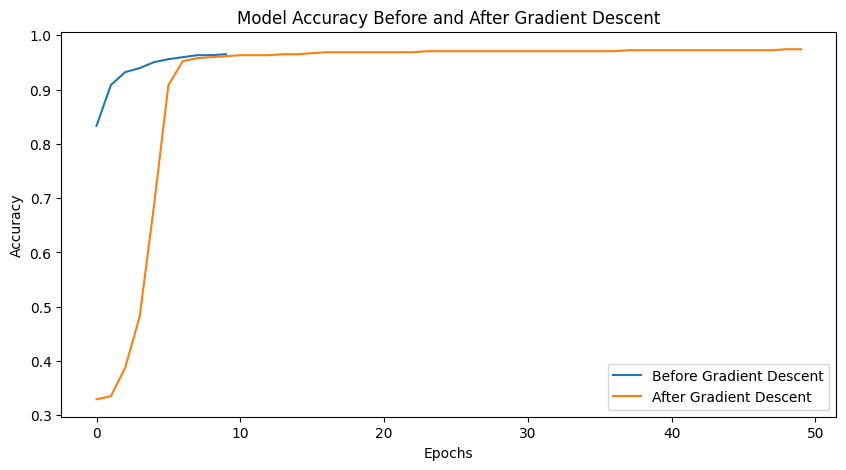

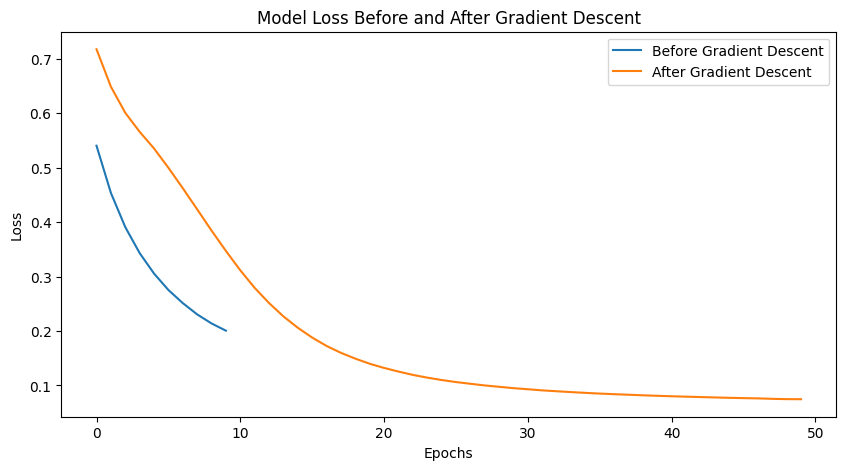

In [ ]:
# Plotting accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(history_before.history['accuracy'], label='Before Gradient Descent')
plt.plot(history_after.history['accuracy'], label='After Gradient Descent')
plt.title('Model Accuracy Before and After Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss comparison
plt.figure(figsize=(10, 5))
plt.plot(history_before.history['loss'], label='Before Gradient Descent')
plt.plot(history_after.history['loss'], label='After Gradient Descent')
plt.title('Model Loss Before and After Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()